# Experiment 01: Influence of number of centers

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

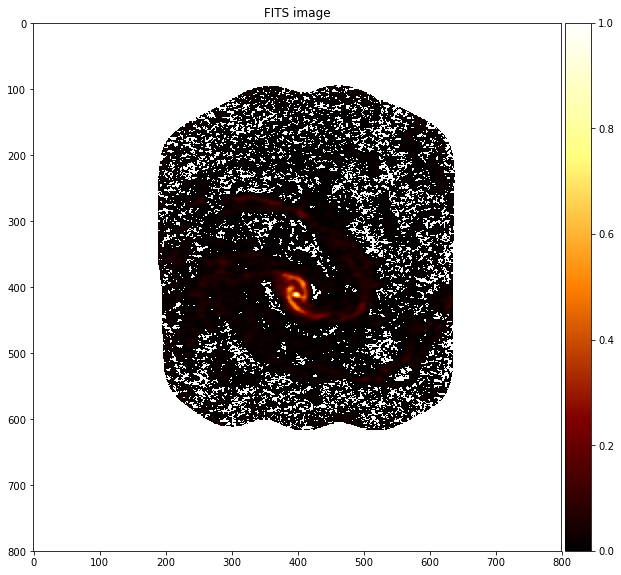

In [2]:
"""
Loading data
"""

#fits_path = '../data/images/Orion.cont.image.fits'
fits_path = '../data/images/M100_combine_CO_cube.image.mom0.pbcor.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/home/mavillan/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3902: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


<function graph.thresholded_image_plot>

In [8]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

elm_list = list()

for Nc in range(25, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 3*Nc - Nb
    
    # points generation
    points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
    center_points = points[0:Nc]
    collocation_points = points[Nc:Nc+Ne]
    boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # points generation
    #center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
    #collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    #boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    #c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
    #c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.))

../lib/points_generation.py:128: RuntimeWarning: invalid value encountered in greater
  pixel_map = data > base_level
../lib/variational.py:79: RuntimeWarning: invalid value encountered in greater
  self.mask = data > base_level


##########################################################################################
Processing 25 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 10100.
nfev: 10113

Residual stats:
Residual RMS: 0.09717575701188719
Residual Variance: 0.007567335422245065
Flux Lost: 0.4472867853044303
Flux Addition: 0.022499177961853925
psi1(u-f): 1.1186663827602759
Exceeded Pixels: 1573
Sharpness: 56.40745591940789
psi2(grad u): 0.19886780640333404
Total elapsed time: 5.779228210449219 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1738421714267347
Mean min distance between collocation and center points

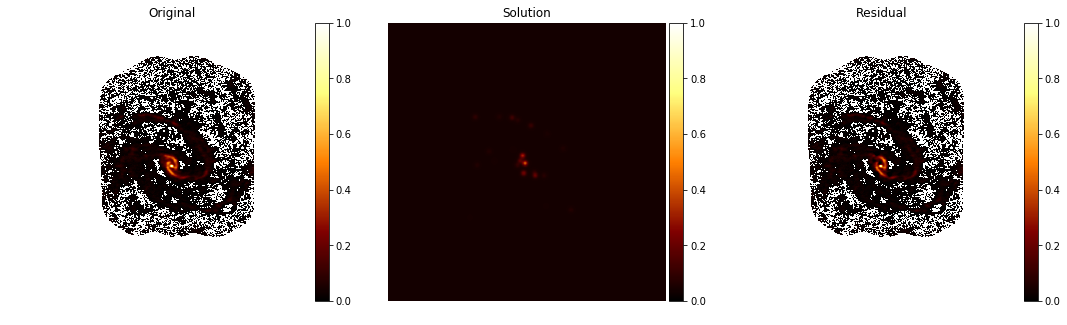

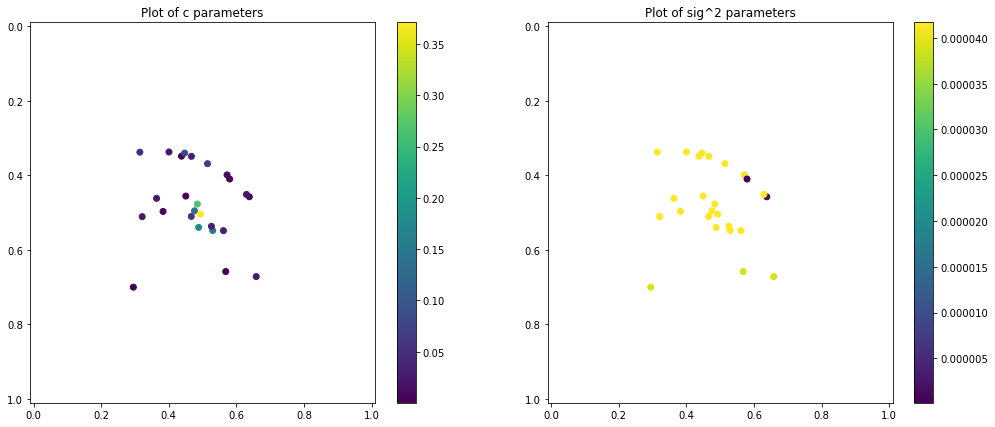

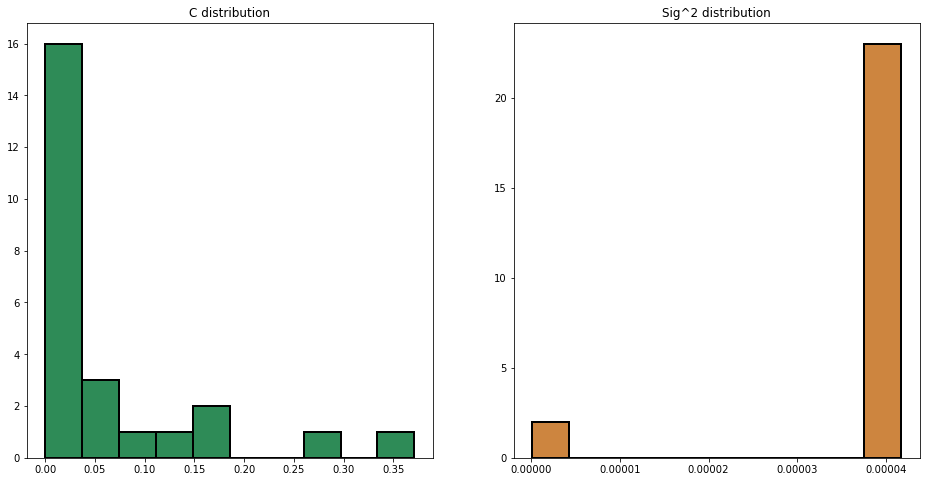

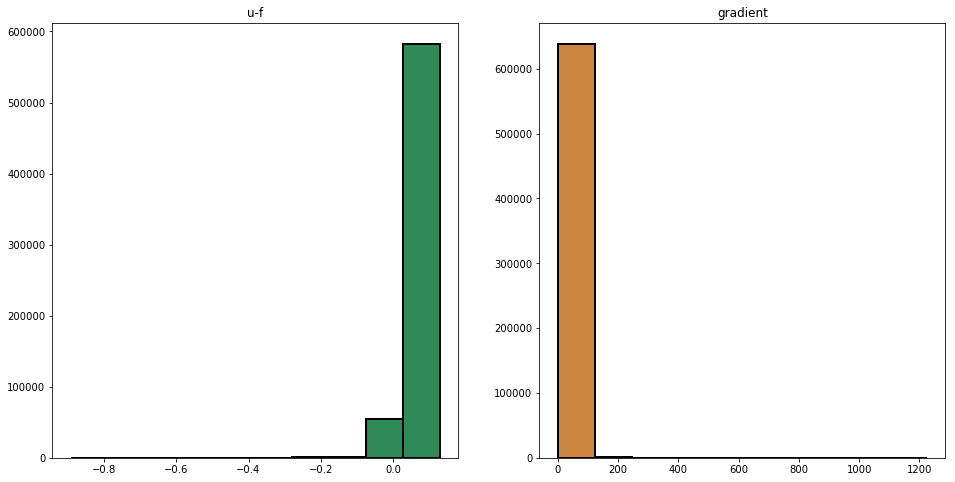

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 1
message: Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
nfev: 16494

Residual stats:
Residual RMS: 0.06658343723449936
Residual Variance: 0.0041504435560348035
Flux Lost: 0.2457112276358475
Flux Addition: 0.08074158328202288
psi1(u-f): 10.954251190017258
Exceeded Pixels: 3804
Sharpness: 115.61891053404273
psi2(grad u): 0.7032803804834609
Total elapsed time: 10.637620687484741 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2644838677938051
Mean min distance be

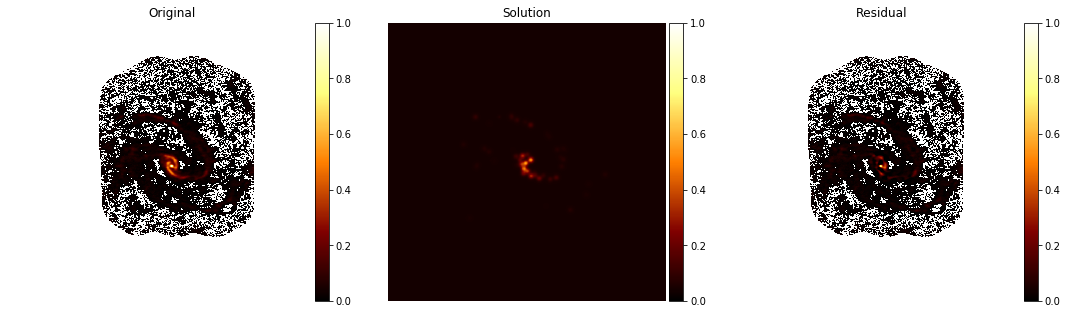

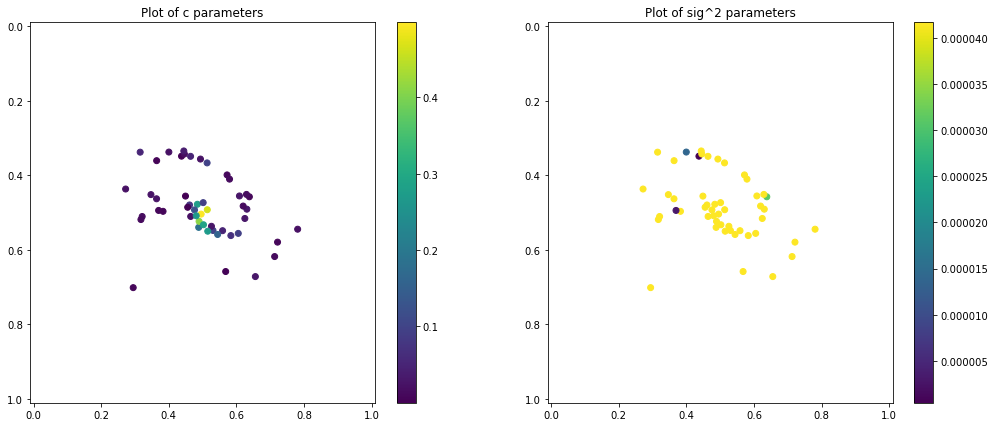

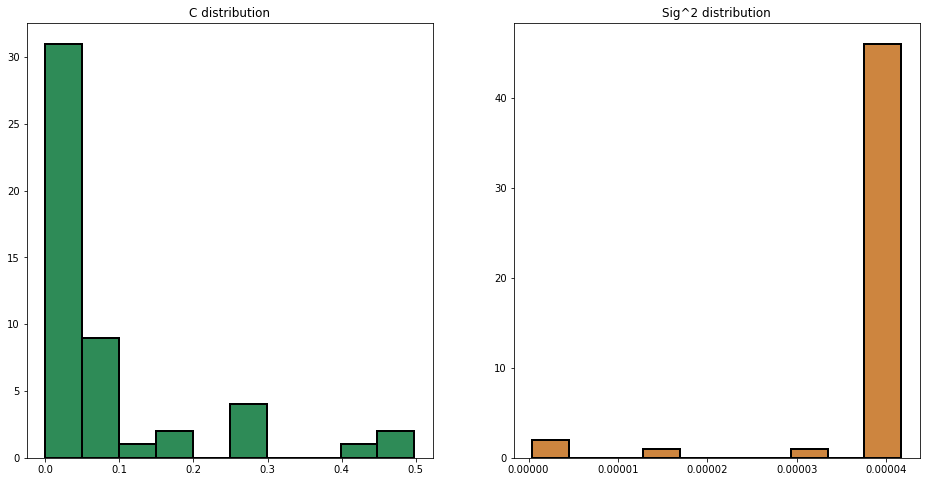

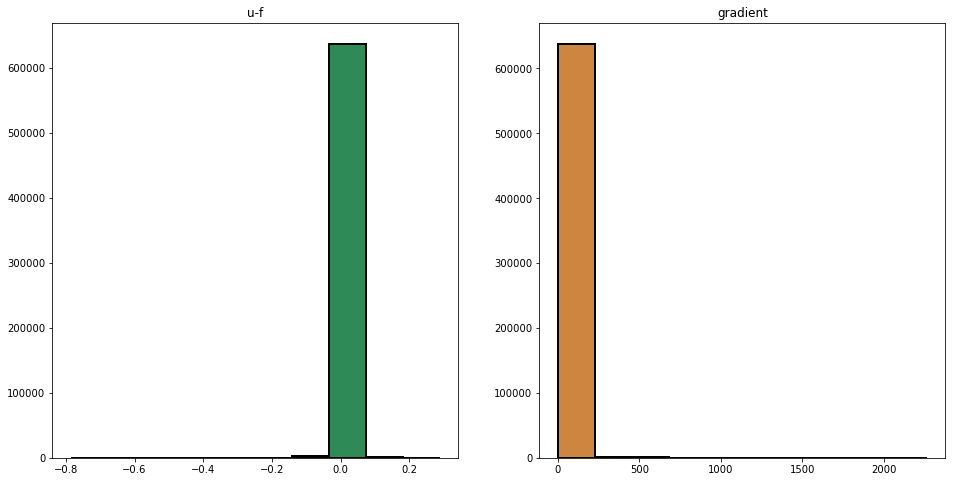

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 1
message: Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
nfev: 24995

Residual stats:
Residual RMS: 0.05058974196127063
Residual Variance: 0.0024858832147735617
Flux Lost: 0.1741257354251413
Flux Addition: 0.09007487217305657
psi1(u-f): 9.459897077068007
Exceeded Pixels: 4891
Sharpness: 128.08553463056376
psi2(grad u): 0.5725963229095326
Total elapsed time: 18.329432487487793 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.25397776874658134
Mean min distance be

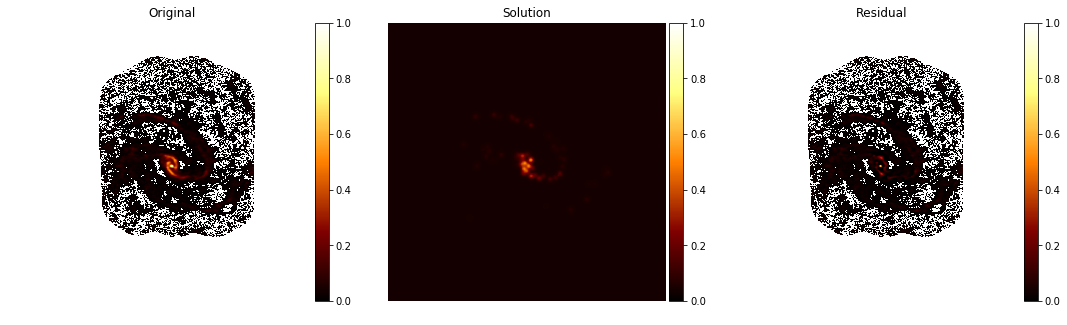

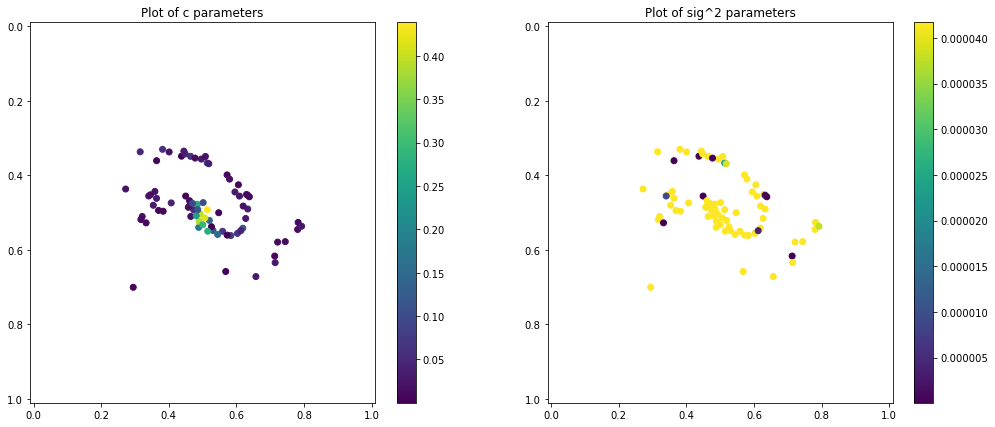

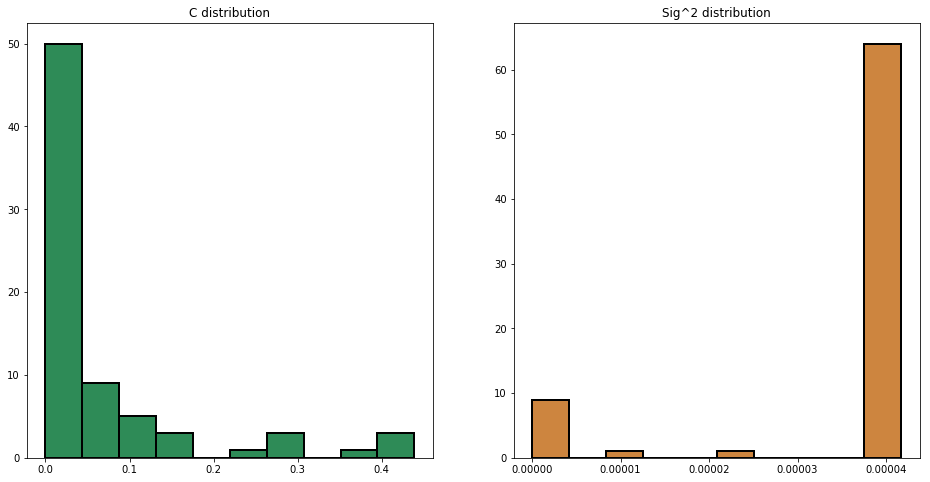

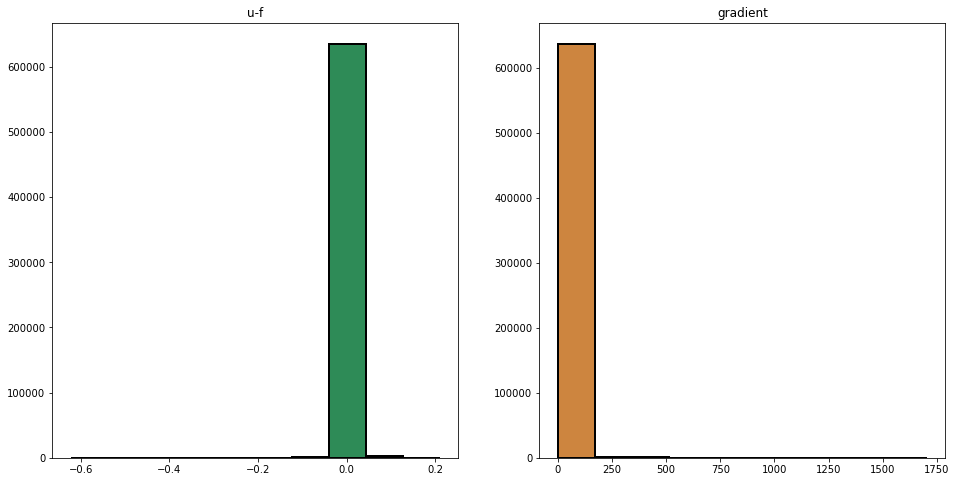

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40108

Residual stats:
Residual RMS: 0.04658291282975727
Residual Variance: 0.002150680938099081
Flux Lost: 0.14202382306144892
Flux Addition: 0.09895035083877315
psi1(u-f): 11.527704140059912
Exceeded Pixels: 5784
Sharpness: 136.0215818904078
psi2(grad u): 0.5946527581112818
Total elapsed time: 33.94691300392151 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.25458738367436407
Mean min distance between collocation and center point

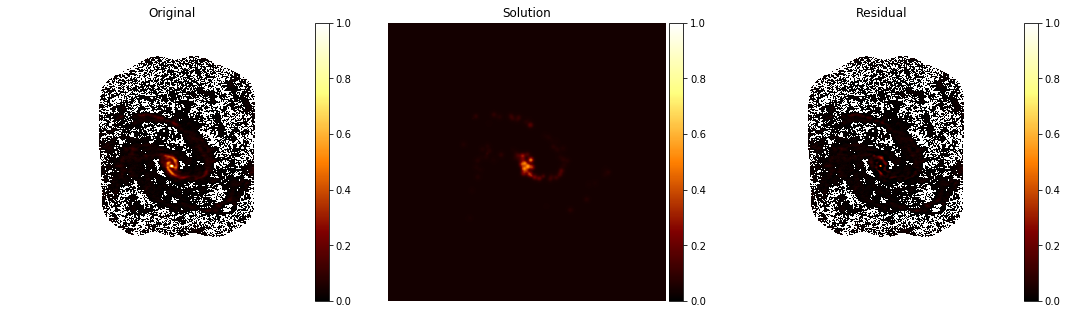

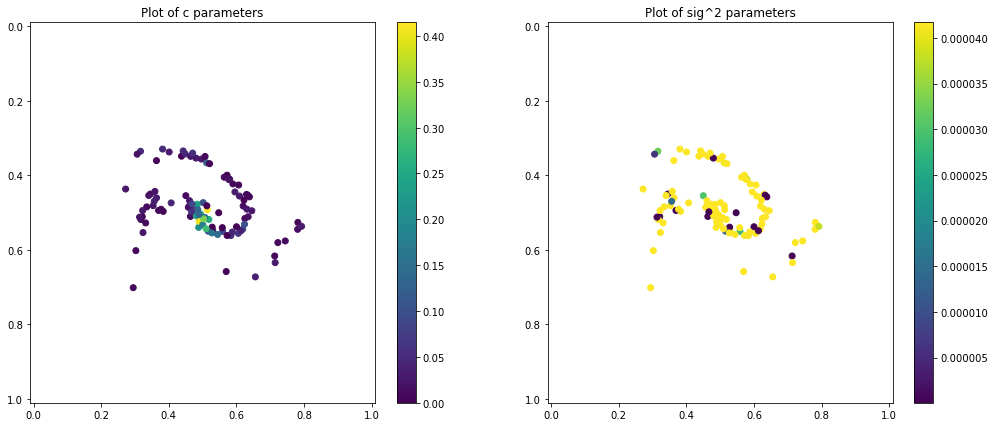

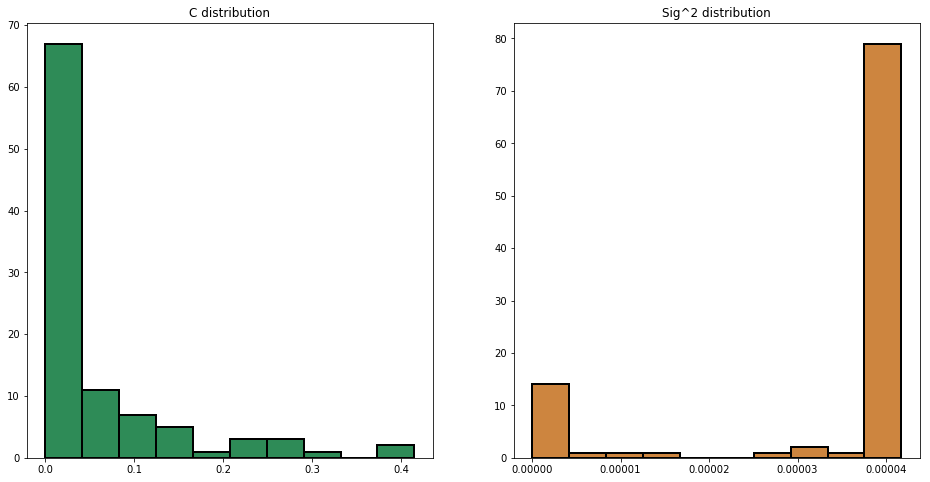

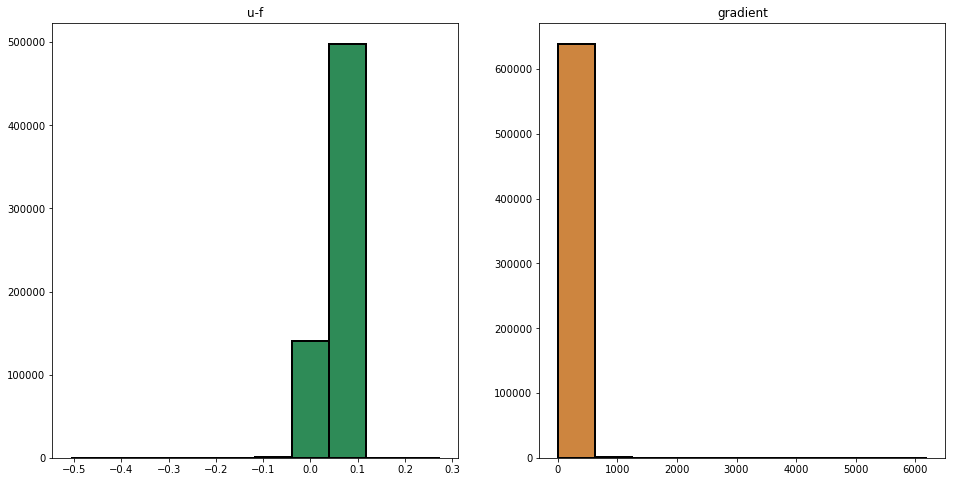

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50113

Residual stats:
Residual RMS: 0.04112886138593923
Residual Variance: 0.001691145333469452
Flux Lost: 0.11221960207625849
Flux Addition: 0.10572922950026488
psi1(u-f): 10.409812453737109
Exceeded Pixels: 6366
Sharpness: 140.20940226398224
psi2(grad u): 0.5861501836363008
Total elapsed time: 50.69574046134949 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.20105149405263595
Mean min distance between collocation and center poin

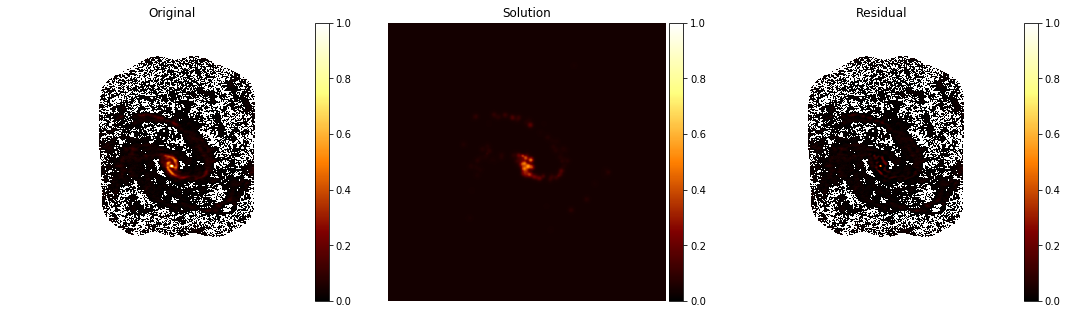

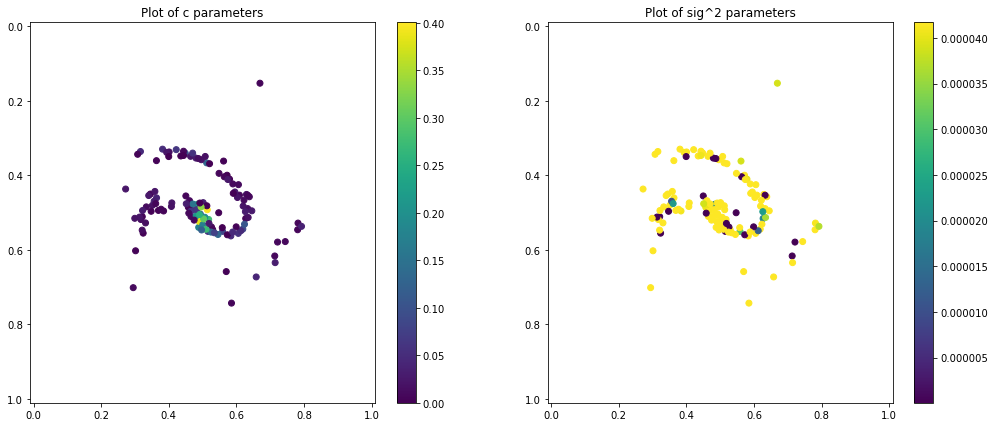

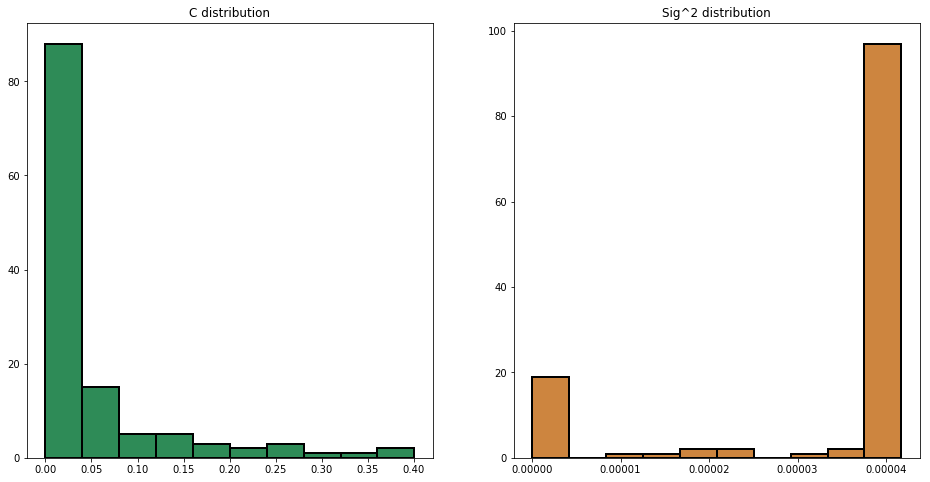

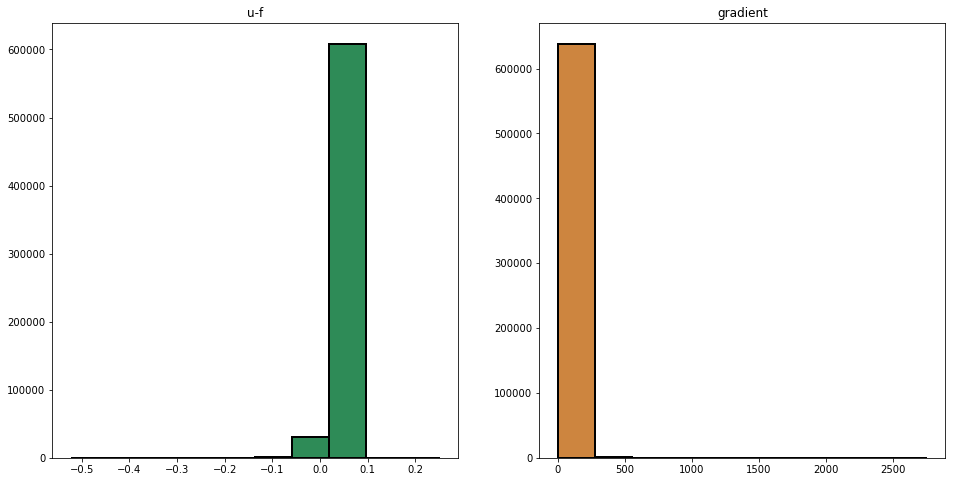

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 1
message: Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
nfev: 50496

Residual stats:
Residual RMS: 0.037070568159525016
Residual Variance: 0.0013741646347765388
Flux Lost: 0.10163045087032152
Flux Addition: 0.0991806369277217
psi1(u-f): 8.484350355047766
Exceeded Pixels: 6379
Sharpness: 142.67893273721347
psi2(grad u): 0.6162610000204866
Total elapsed time: 62.127110719680786 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1992185597531066
Mean min distance b

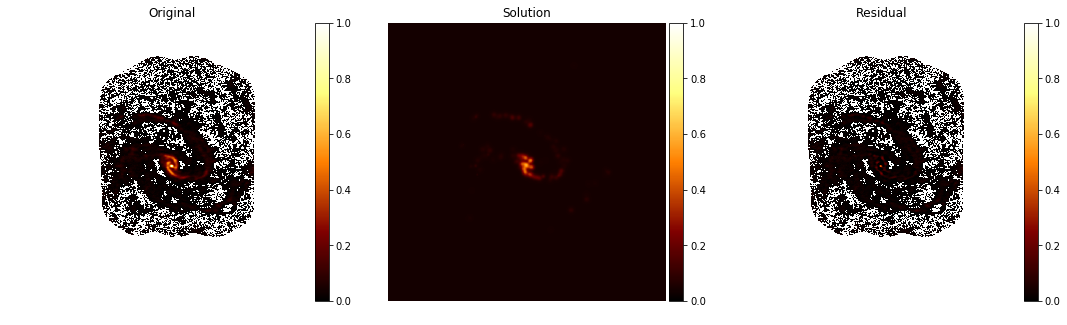

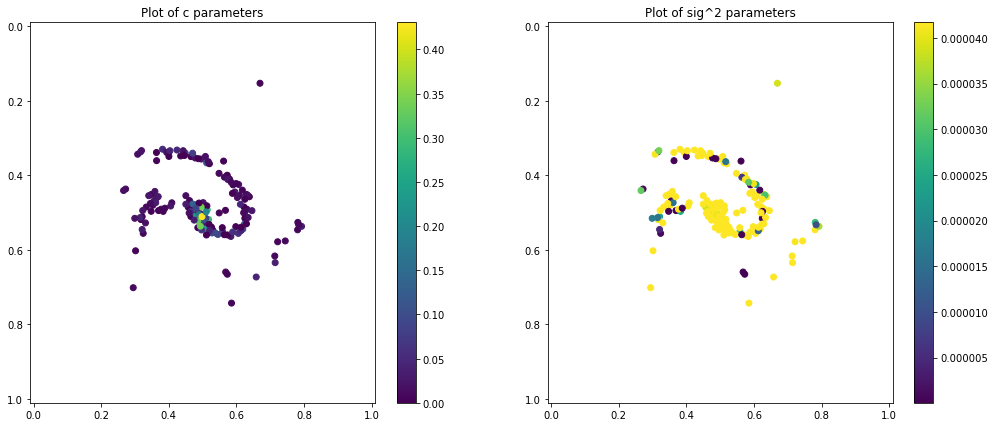

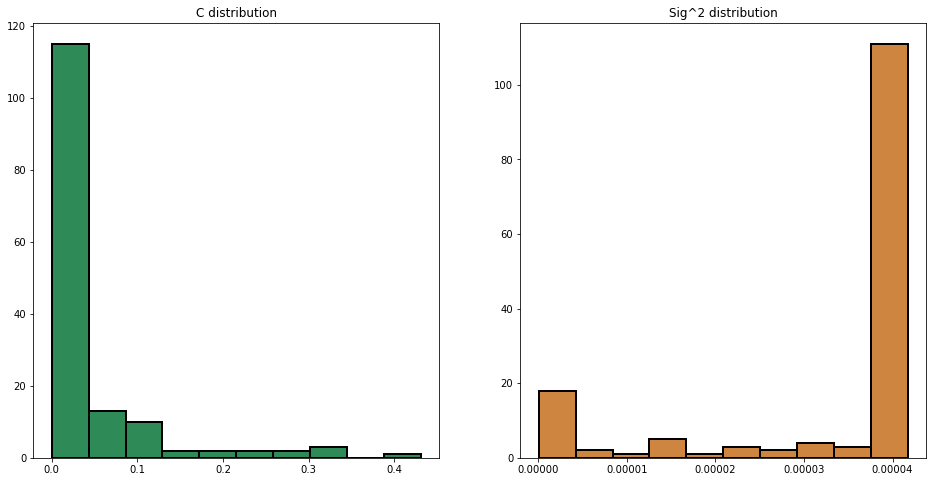

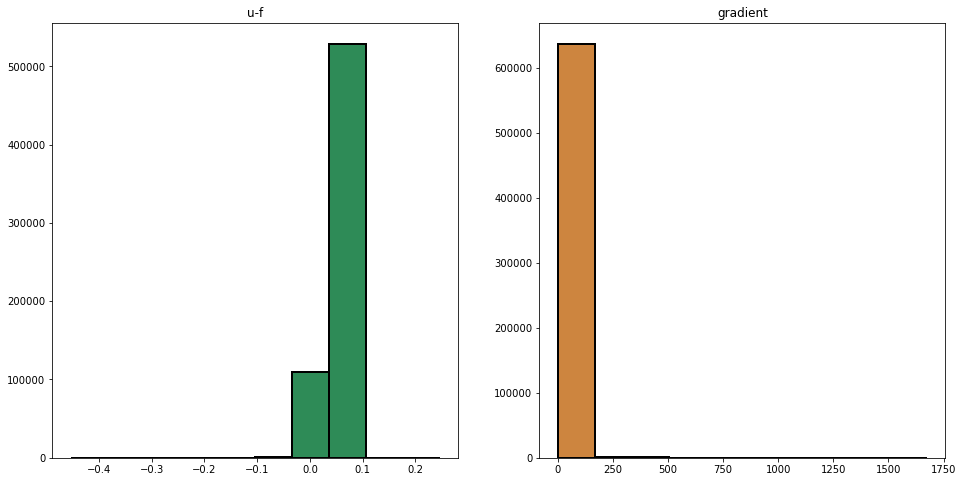

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 68015

Residual stats:
Residual RMS: 0.033039836354769286
Residual Variance: 0.0010915704465151433
Flux Lost: 0.08827802597468747
Flux Addition: 0.09068727404011032
psi1(u-f): 6.10377126887955
Exceeded Pixels: 6666
Sharpness: 148.19226484366723
psi2(grad u): 0.7205414711472041
Total elapsed time: 96.93538999557495 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1903580961227399
Mean min distance between collocation a

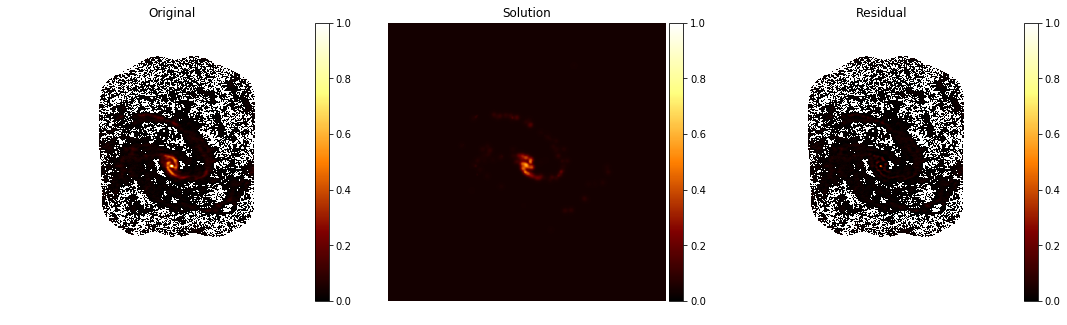

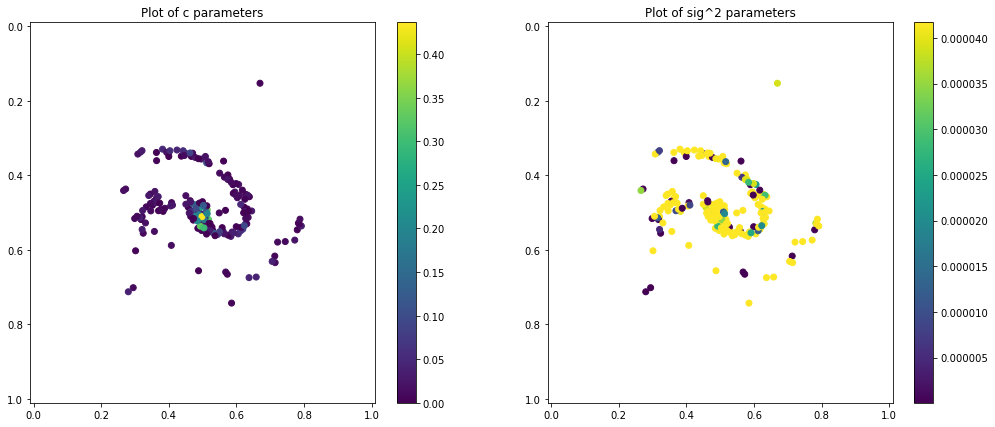

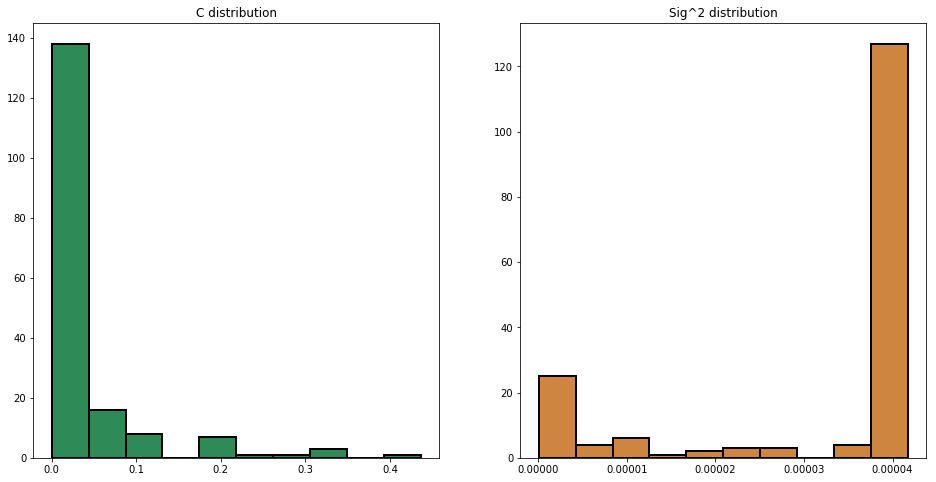

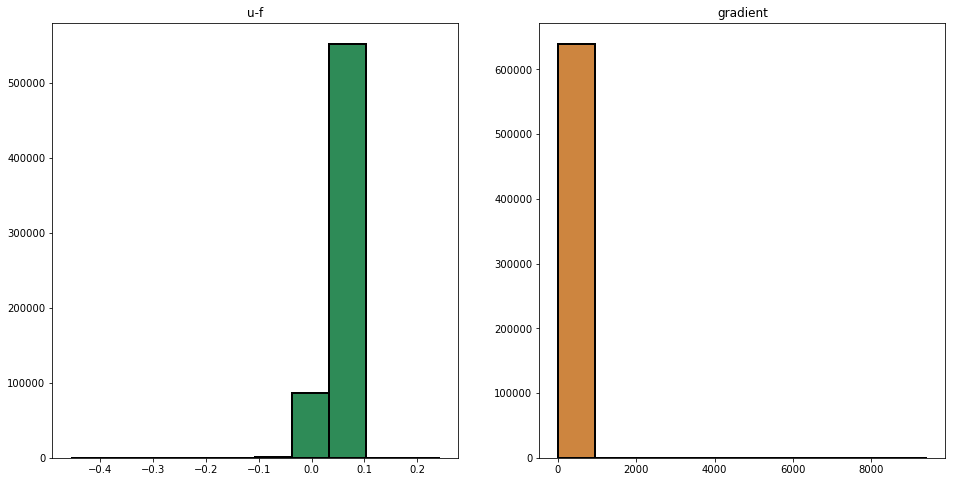

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80117

Residual stats:
Residual RMS: 0.03292419373644067
Residual Variance: 0.001083933349085232
Flux Lost: 0.08752855408111211
Flux Addition: 0.08494877428000303
psi1(u-f): 4.4442624961615955
Exceeded Pixels: 6759
Sharpness: 147.65128589338678
psi2(grad u): 0.6938310041409705
Total elapsed time: 135.02670812606812 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.19232487034105797
Mean min distance between collocation and center poi

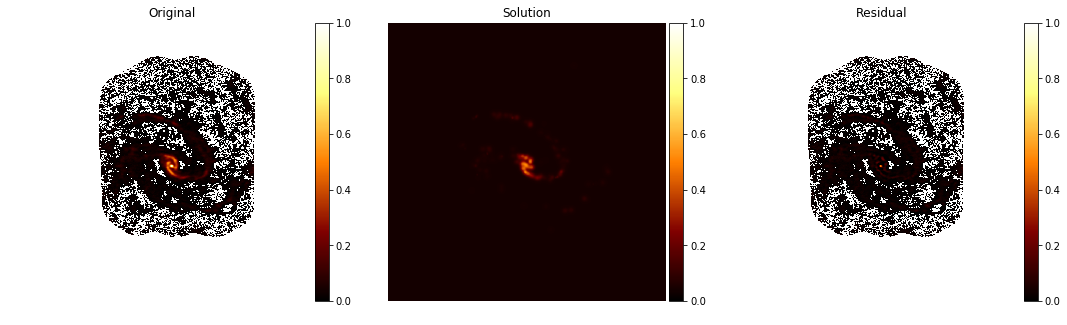

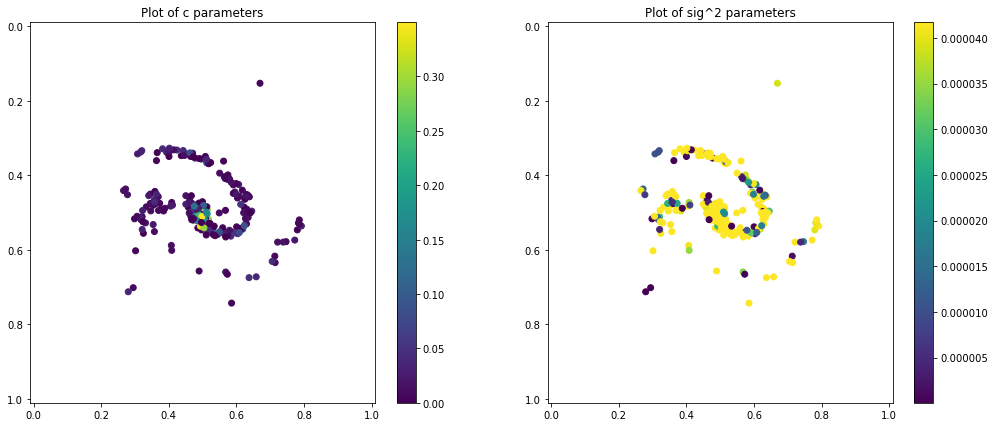

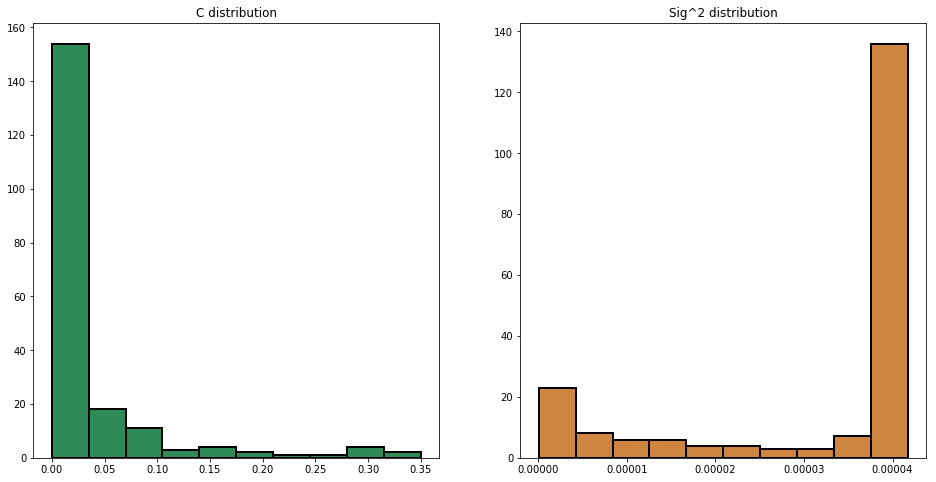

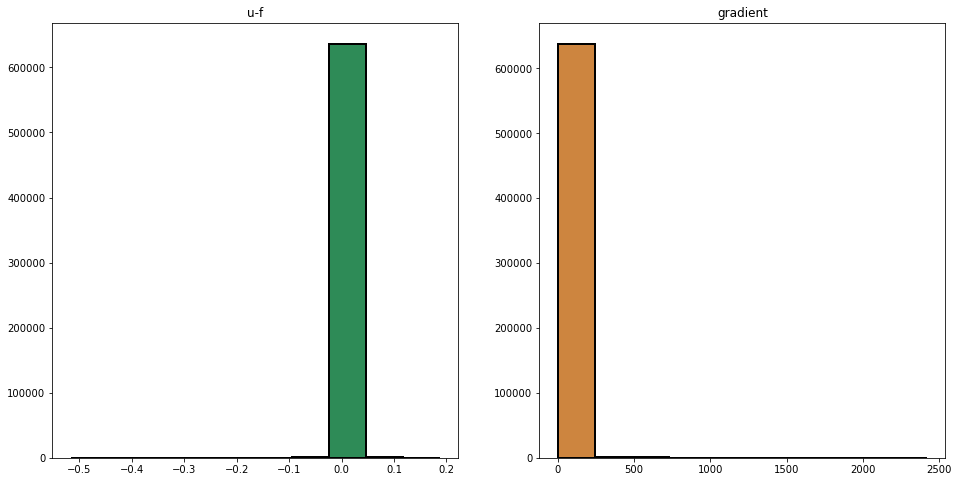

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90112

Residual stats:
Residual RMS: 0.031138478858086502
Residual Variance: 0.0009688931034440946
Flux Lost: 0.07805131149460123
Flux Addition: 0.08632590952905574
psi1(u-f): 4.780698561670599
Exceeded Pixels: 7154
Sharpness: 155.02224735481954
psi2(grad u): 0.7800234711601097
Total elapsed time: 176.76354265213013 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.19069291413631237
Mean min distance between collocation and center po

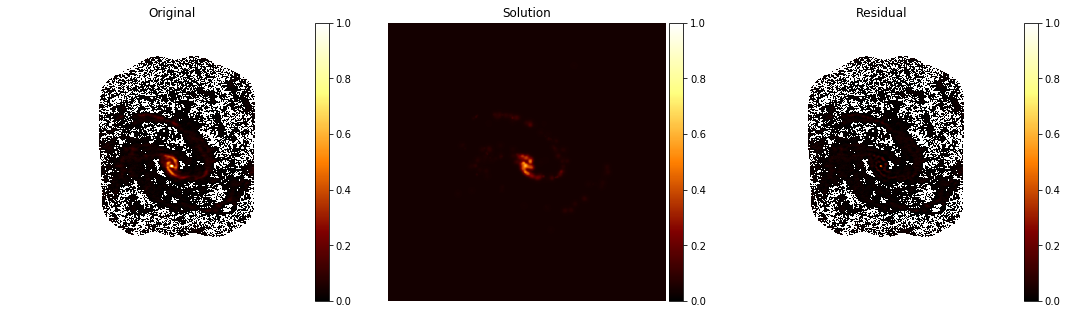

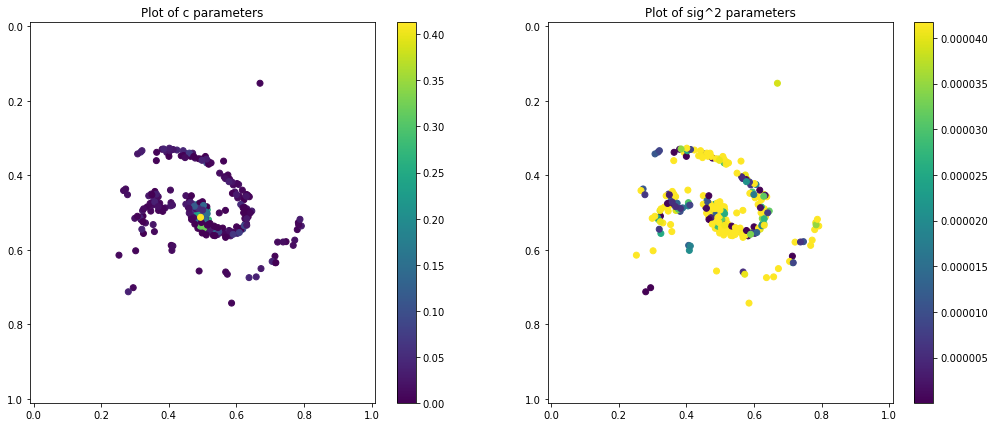

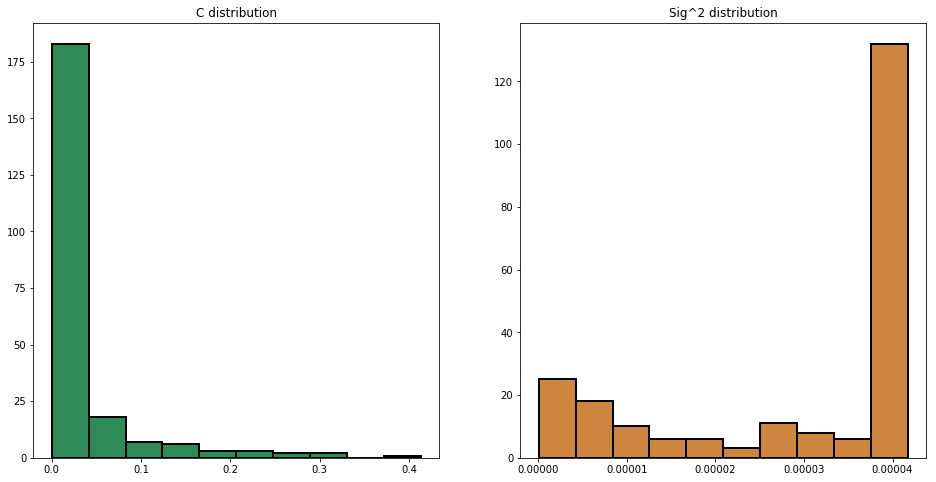

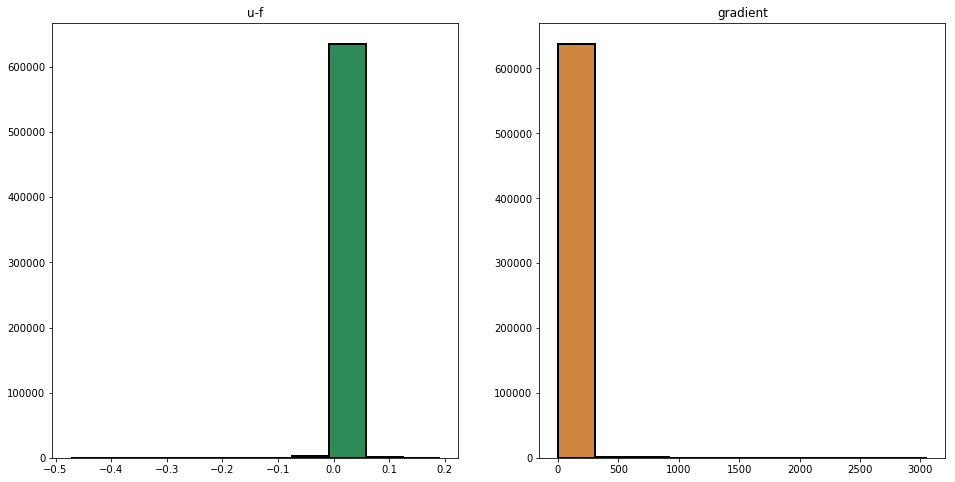

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100109

Residual stats:
Residual RMS: 0.029717596487771416
Residual Variance: 0.0008822764264765907
Flux Lost: 0.07295812637261621
Flux Addition: 0.08204898687242354
psi1(u-f): 4.051672096344322
Exceeded Pixels: 7210
Sharpness: 158.02119161655594
psi2(grad u): 0.8361874795436256
Total elapsed time: 229.42109155654907 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.19070634932377203
Mean min distance between collocation and center 

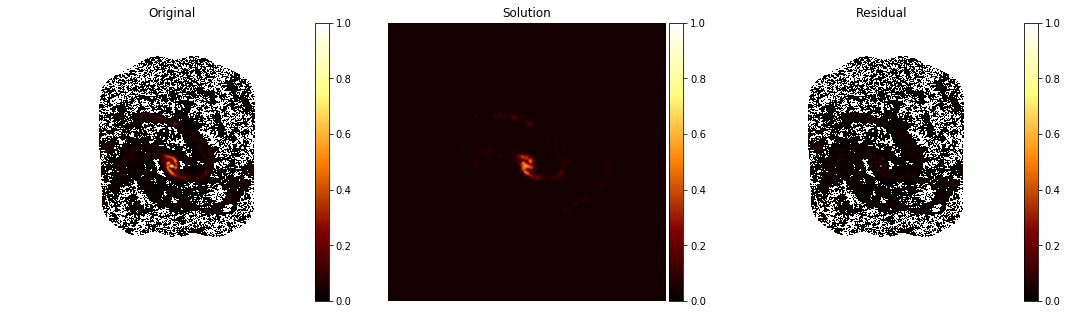

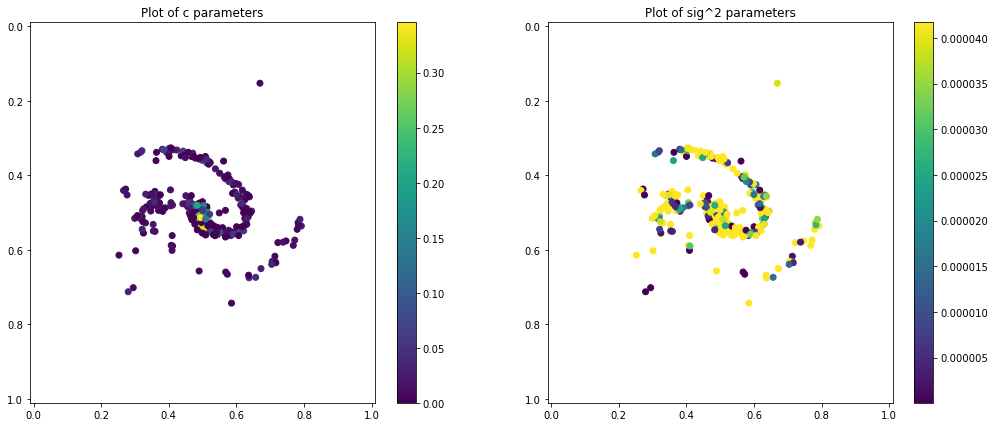

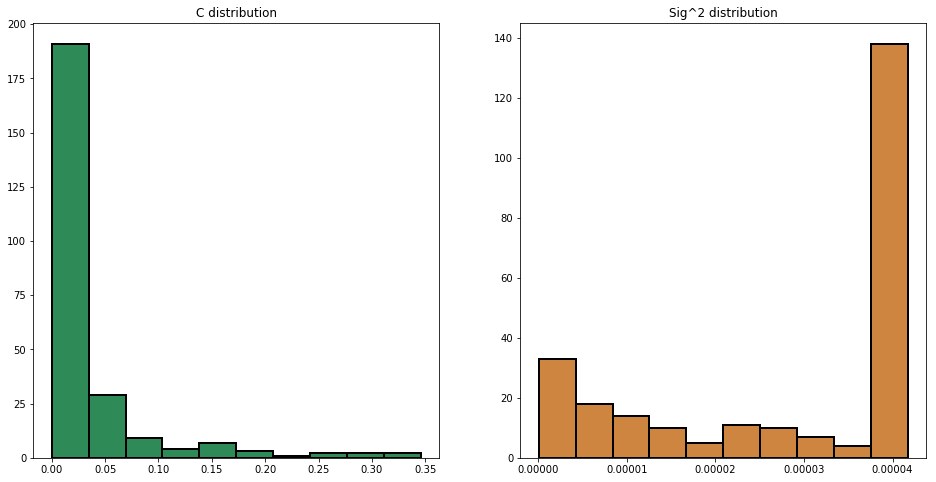

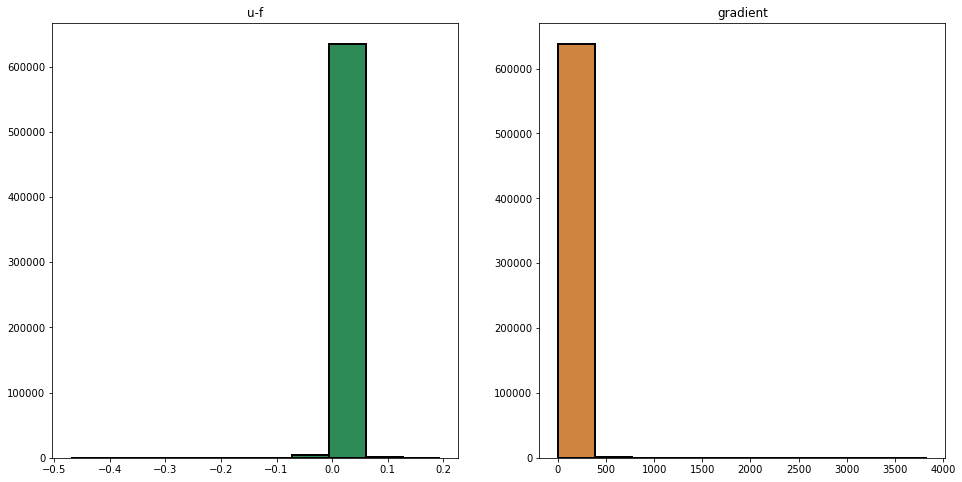

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110107

Residual stats:
Residual RMS: 0.024239570400575117
Residual Variance: 0.0005867876245106732
Flux Lost: 0.06572068892825718
Flux Addition: 0.07432239531164436
psi1(u-f): 2.6769090037927143
Exceeded Pixels: 7179
Sharpness: 164.88304208344817
psi2(grad u): 1.8726155784205134
Total elapsed time: 286.51446747779846 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.15779353375579216
Mean min distance between collocation and center

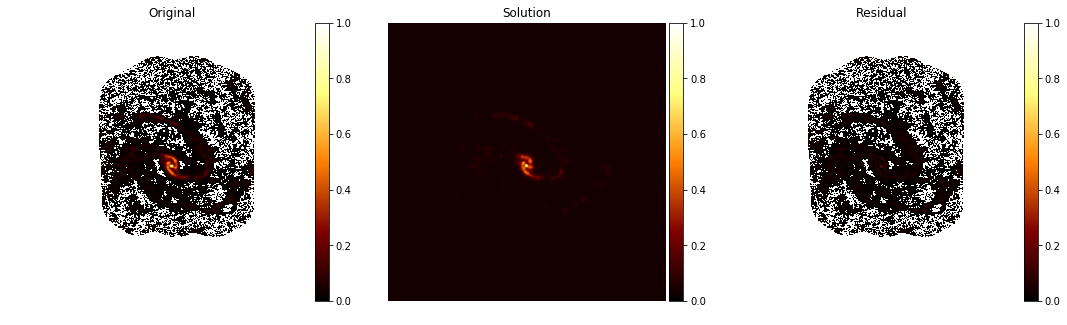

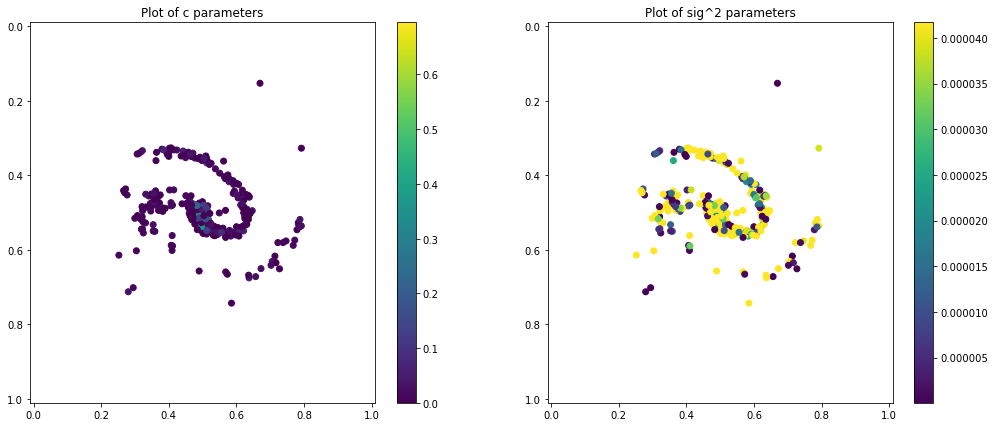

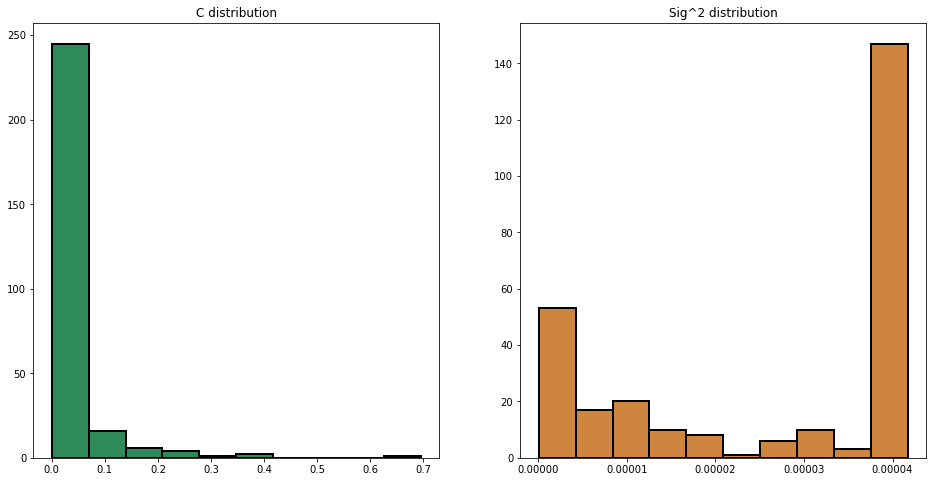

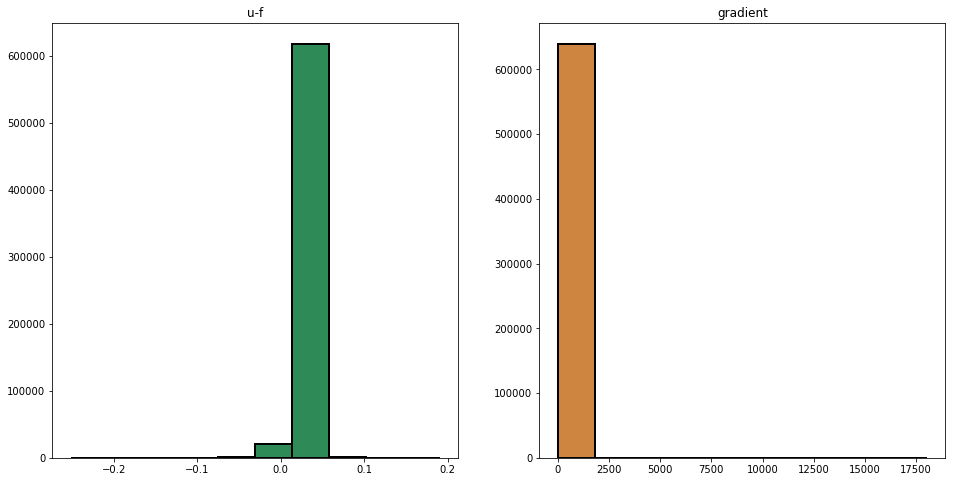

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.02328562364124139
Residual Variance: 0.0005417625048655978
Flux Lost: 0.06501226909063897
Flux Addition: 0.07164817224378904
psi1(u-f): 2.268247061039632
Exceeded Pixels: 7148
Sharpness: 167.80125170472976
psi2(grad u): 1.9618403971930893
Total elapsed time: 352.85181307792664 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06490820241469882
Mean min distance between collocation and center p

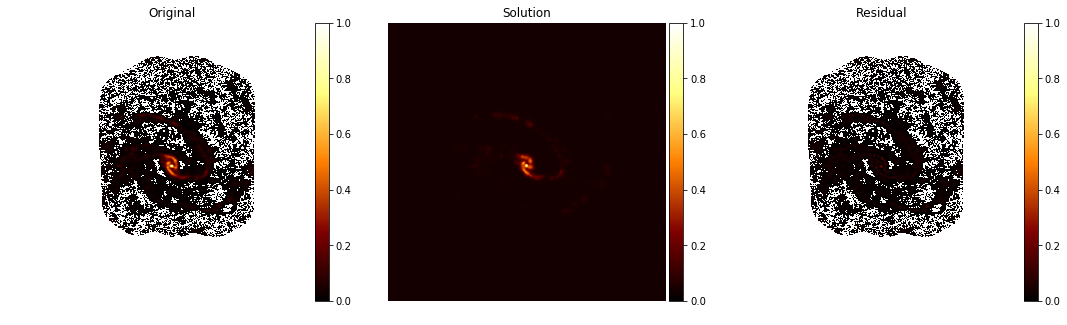

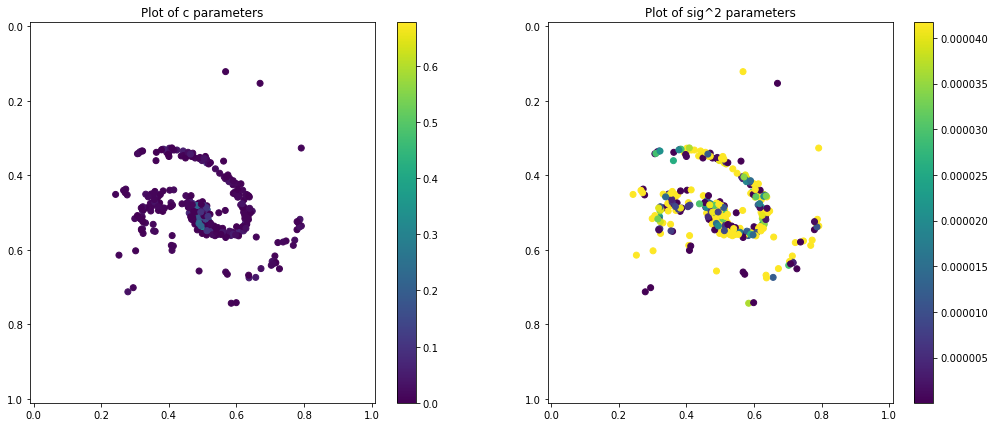

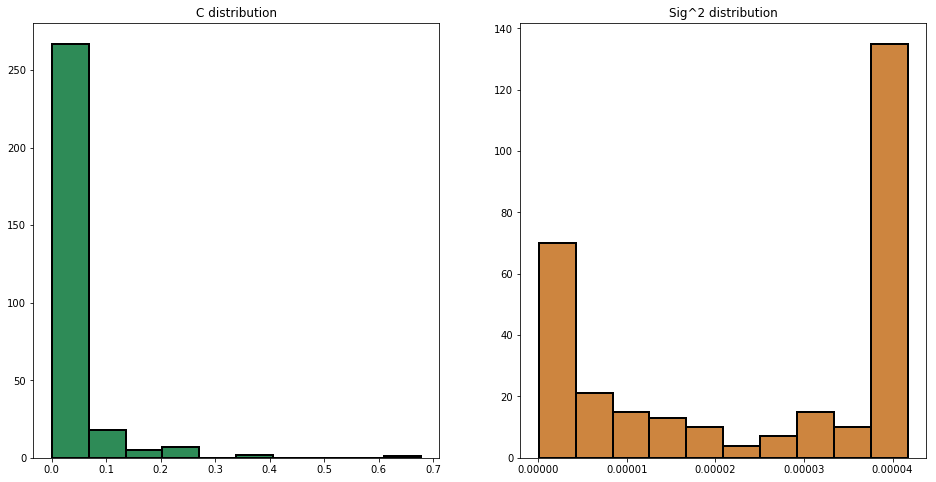

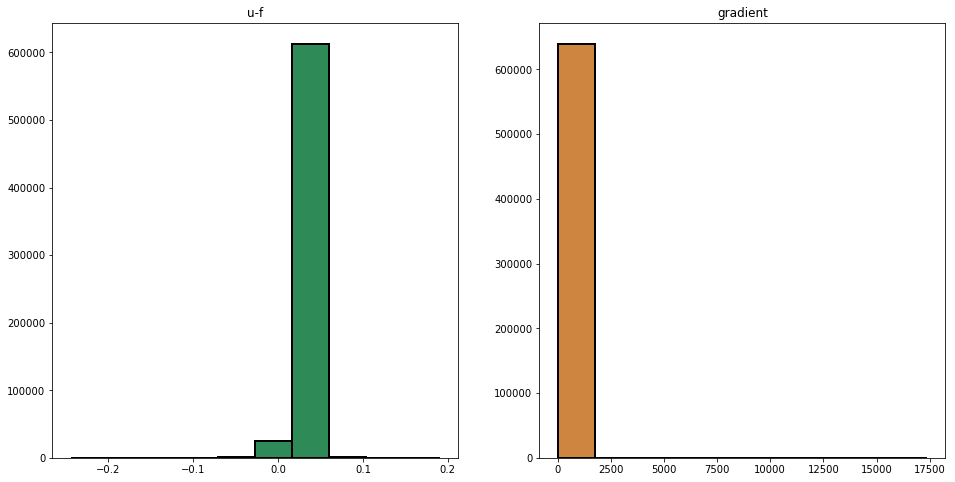

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130108

Residual stats:
Residual RMS: 0.022407910655745027
Residual Variance: 0.0005019734373847656
Flux Lost: 0.06279763857058739
Flux Addition: 0.06648082561842508
psi1(u-f): 2.0067867704446622
Exceeded Pixels: 7054
Sharpness: 168.38440481318625
psi2(grad u): 2.0529299571603192
Total elapsed time: 436.3106224536896 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06490820342074986
Mean min distance between collocation and center 

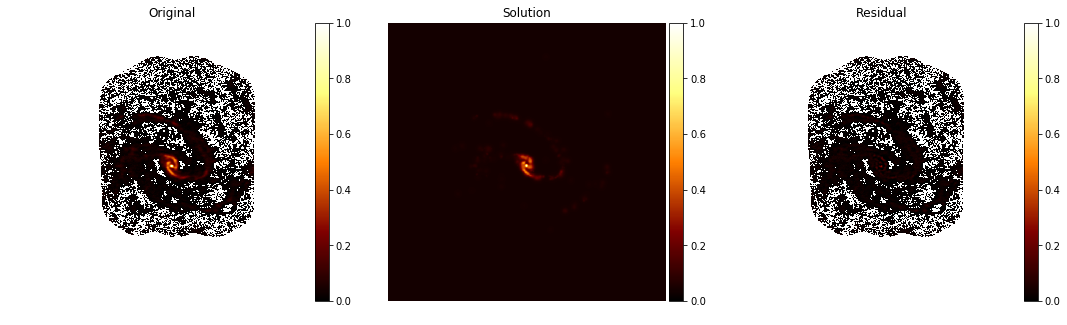

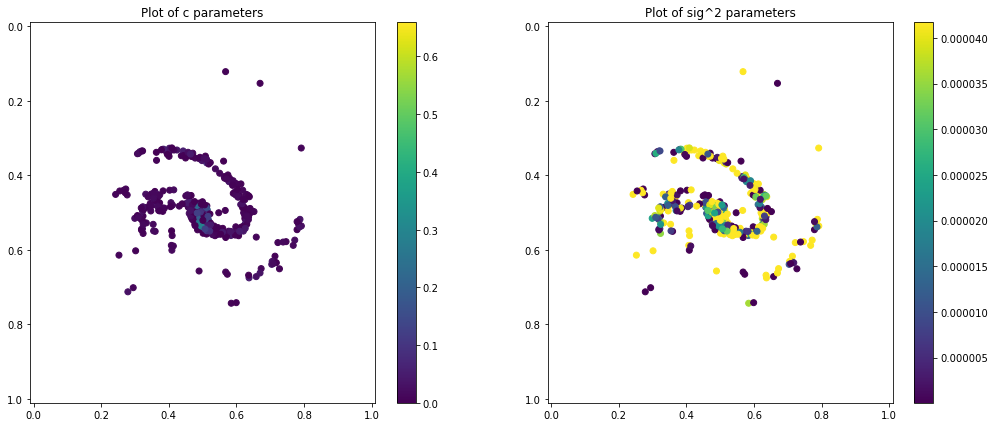

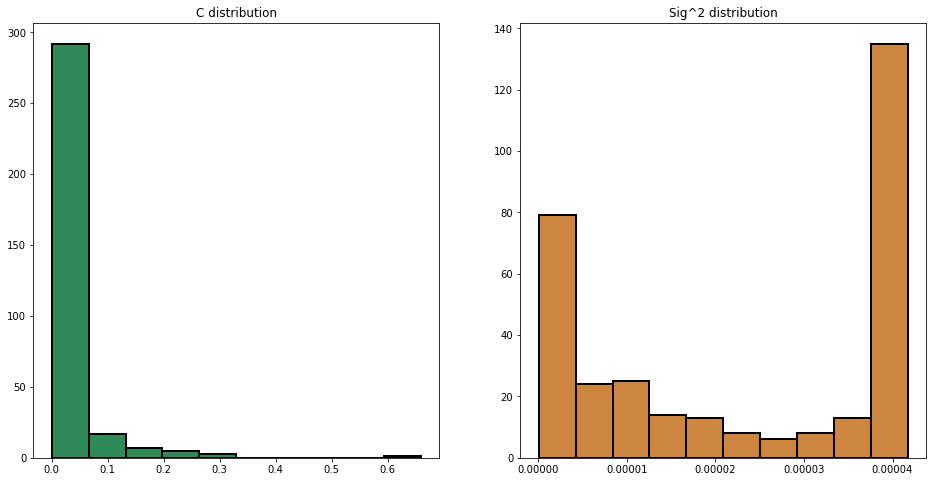

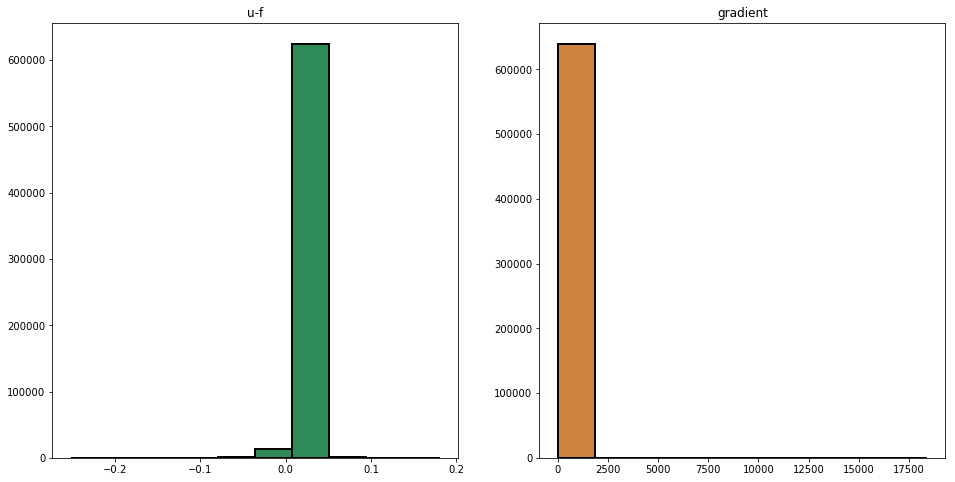

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140108

Residual stats:
Residual RMS: 0.020170157247857333
Residual Variance: 0.00040559619295914203
Flux Lost: 0.05338127668661019
Flux Addition: 0.0642987956362968
psi1(u-f): 1.7722907631969766
Exceeded Pixels: 7375
Sharpness: 175.48281941169952
psi2(grad u): 2.1186357723215425
Total elapsed time: 541.7485363483429 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06490832090002843
Mean min distance between collocation and center 

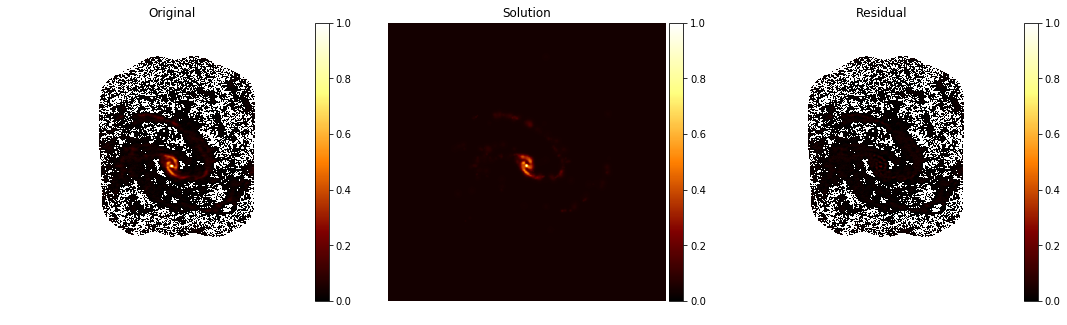

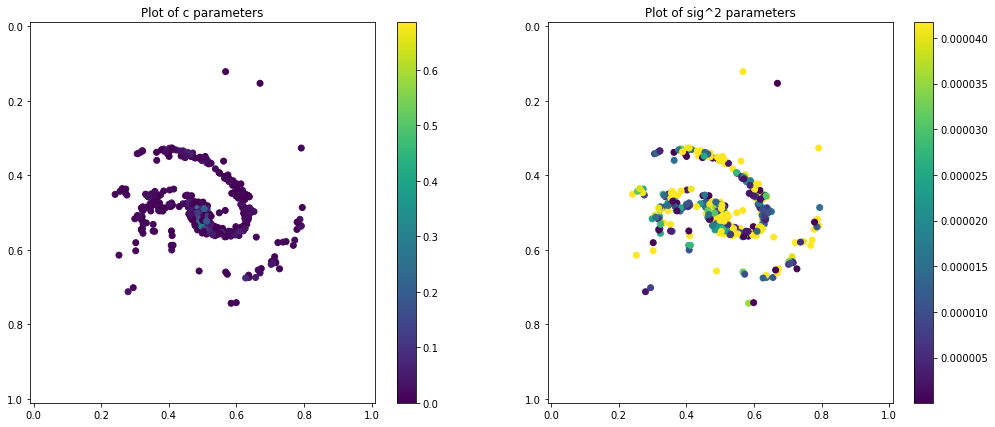

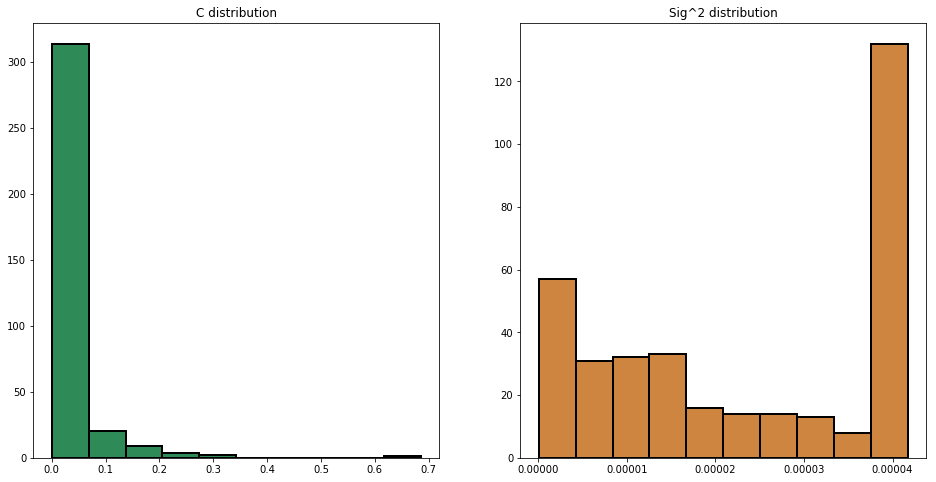

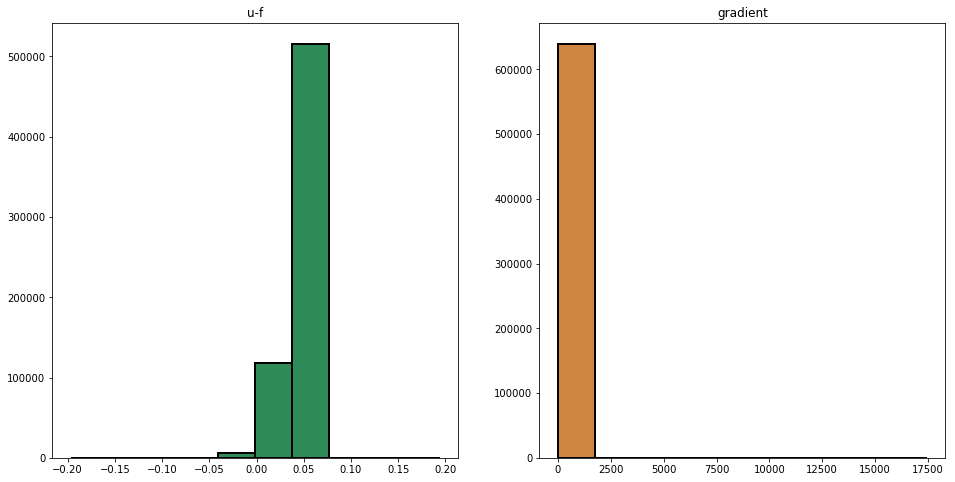

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150111

Residual stats:
Residual RMS: 0.018379563450080044
Residual Variance: 0.0003374376305319024
Flux Lost: 0.049848781272847066
Flux Addition: 0.05582055975026577
psi1(u-f): 1.0912997350082585
Exceeded Pixels: 7268
Sharpness: 178.6004671283958
psi2(grad u): 2.1148132246114795
Total elapsed time: 667.2758264541626 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06509078403741136
Mean min distance between collocation and center 

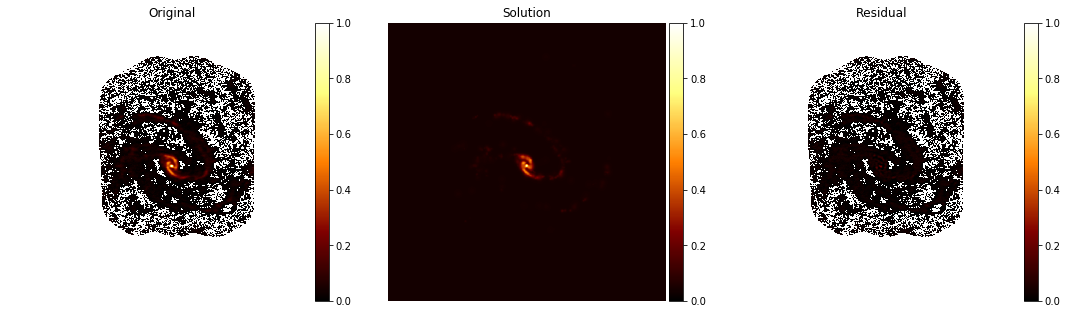

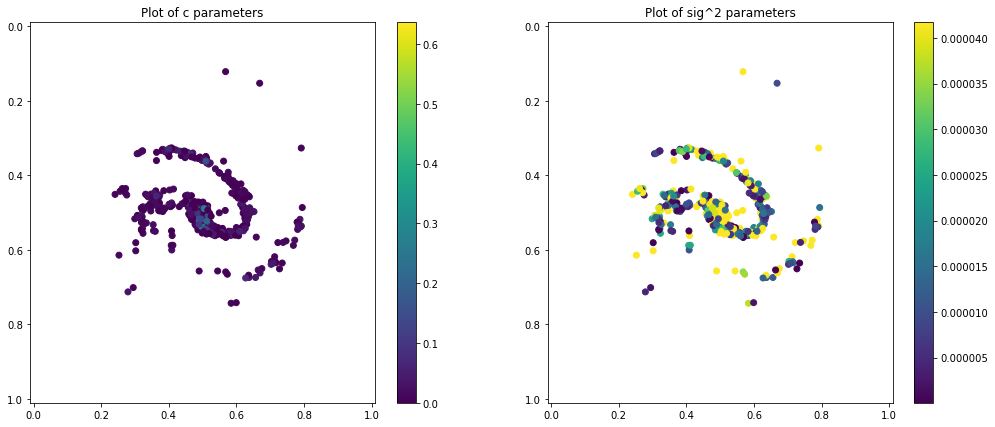

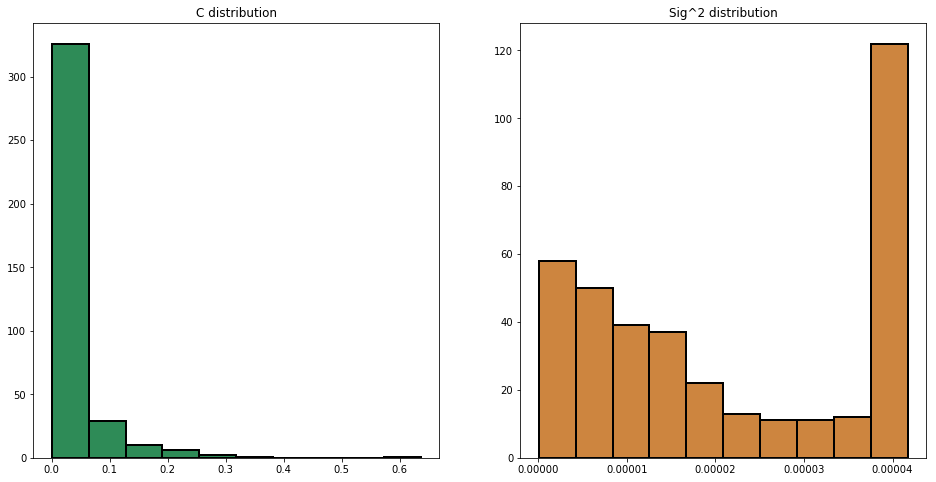

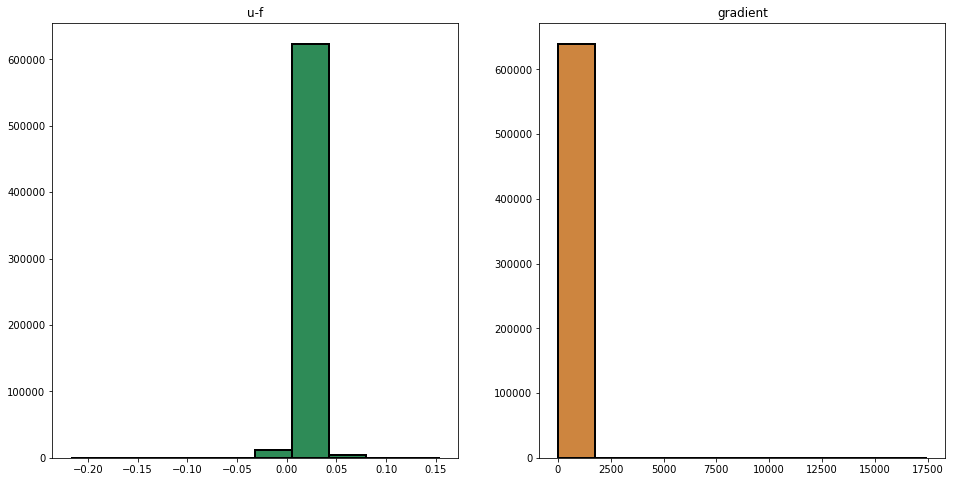

##########################################################################################
Processing 400 centers example
##########################################################################################



../lib/variational.py:34: RuntimeWarning: invalid value encountered in less_equal
  mask0 = x<=0.
../lib/variational.py:35: RuntimeWarning: invalid value encountered in greater_equal
  mask1 = x>=1.



 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160108

Residual stats:
Residual RMS: 0.01602448821778885
Residual Variance: 0.00025675043930596696
Flux Lost: 0.04462318502719443
Flux Addition: 0.046425915198754275
psi1(u-f): 0.6579626736697222
Exceeded Pixels: 7096
Sharpness: 181.88688957159508
psi2(grad u): 2.294725513522297
Total elapsed time: 791.0885951519012 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06492285894755394
Mean min distance between collocation and center points: 0.004536133278808786

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.055410686607446344
Max min distance in the (standarized) parameters space: 0.5599986759964943


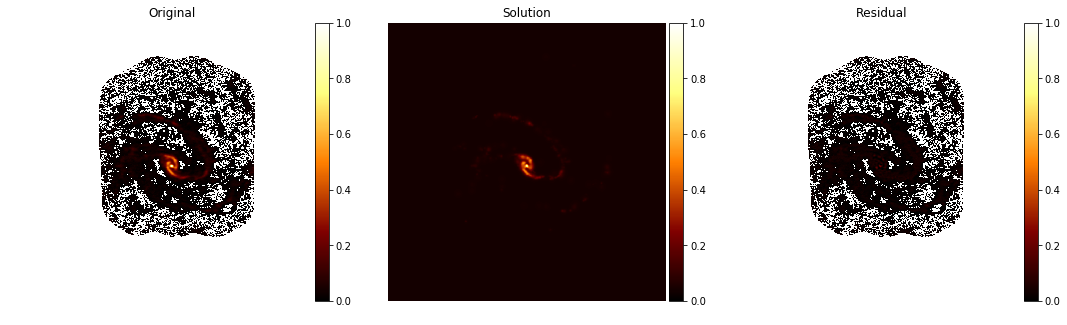

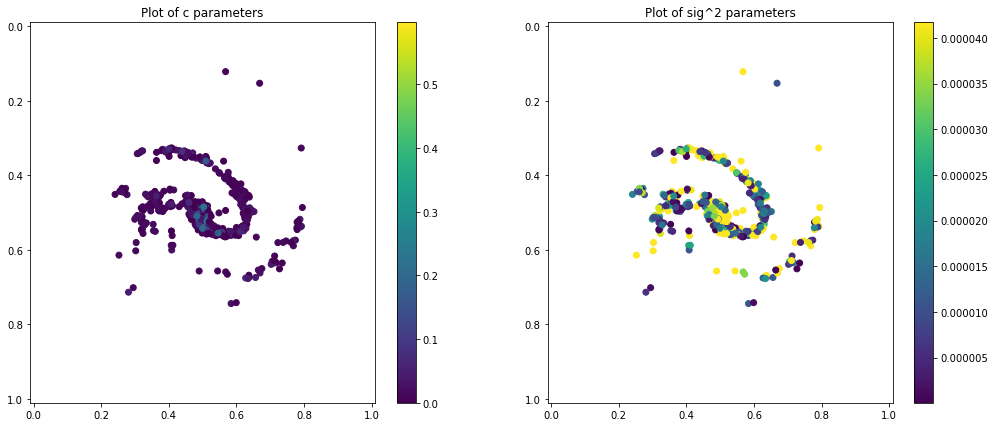

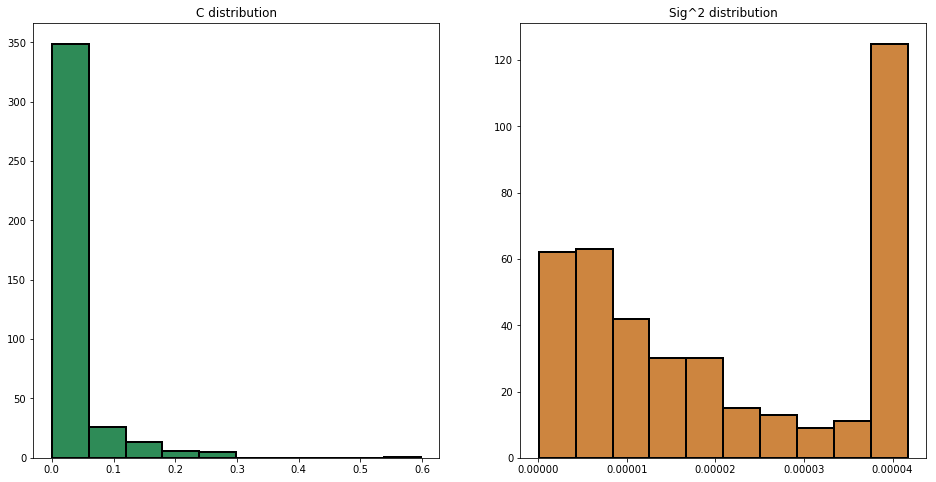

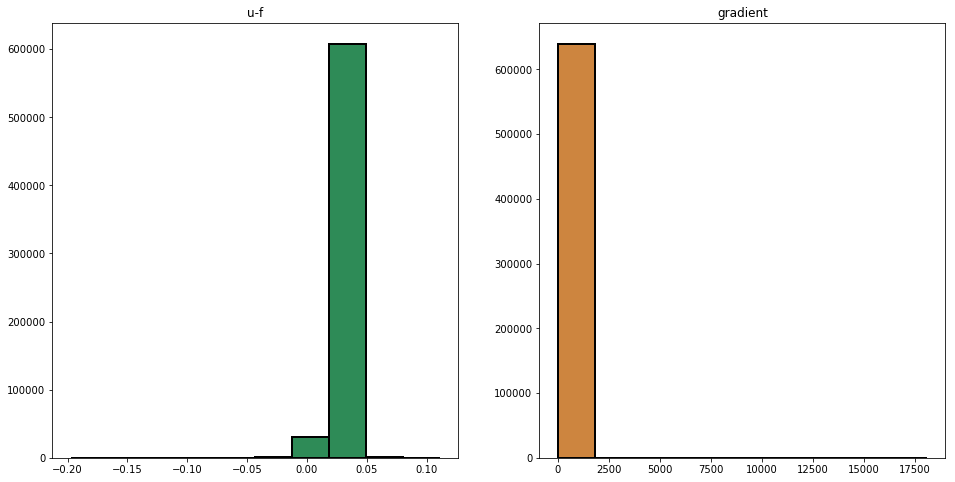

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170114

Residual stats:
Residual RMS: 0.013841439324297064
Residual Variance: 0.0001915338374125305
Flux Lost: 0.04229998336464343
Flux Addition: 0.044528038875032316
psi1(u-f): 0.47771318774318955
Exceeded Pixels: 6980
Sharpness: 183.40244542389715
psi2(grad u): 2.9350544189146546
Total elapsed time: 927.4097135066986 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06491893144280106
Mean min distance between collocation and cente

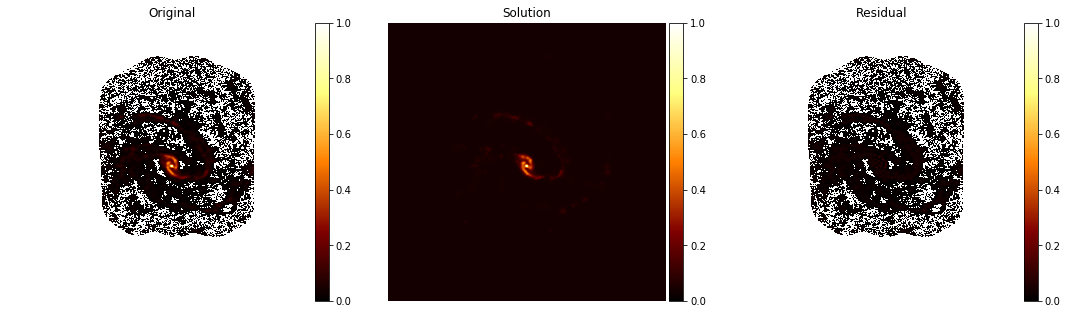

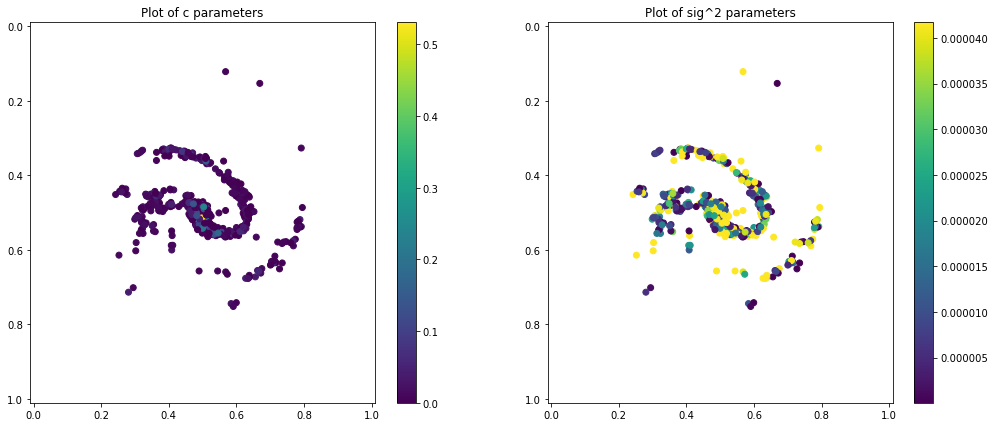

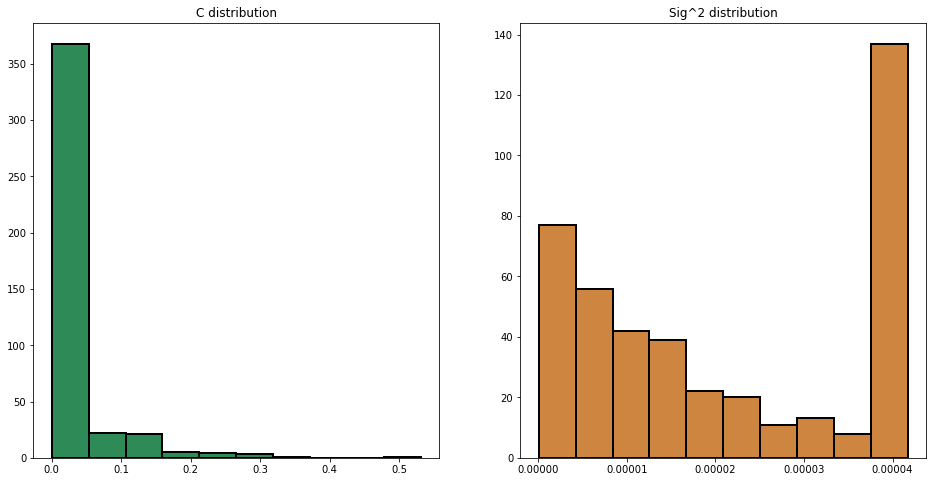

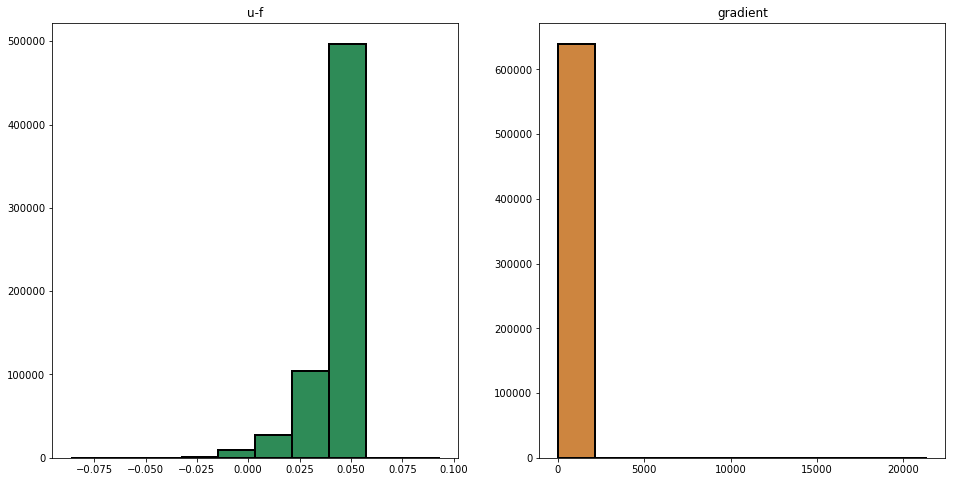

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180112

Residual stats:
Residual RMS: 0.01308837348937041
Residual Variance: 0.0001713003420094625
Flux Lost: 0.04122146538801188
Flux Addition: 0.04051565973549508
psi1(u-f): 0.4029256517144133
Exceeded Pixels: 6868
Sharpness: 183.26754772045751
psi2(grad u): 2.8659198813929674
Total elapsed time: 1089.3534417152405 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.07465101255510916
Mean min distance between collocation and center 

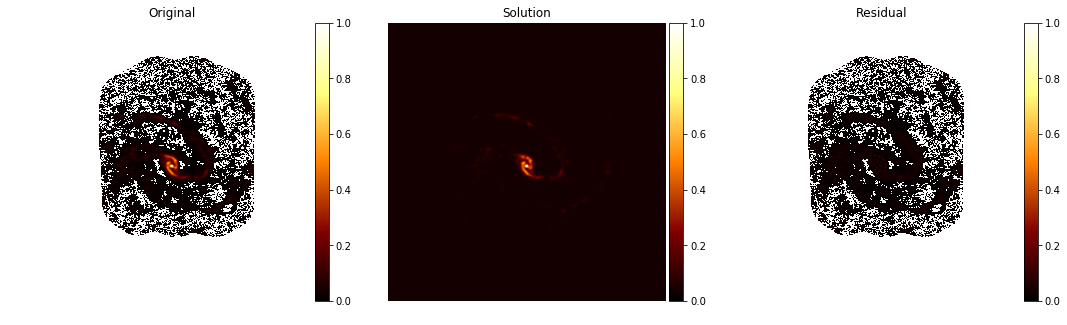

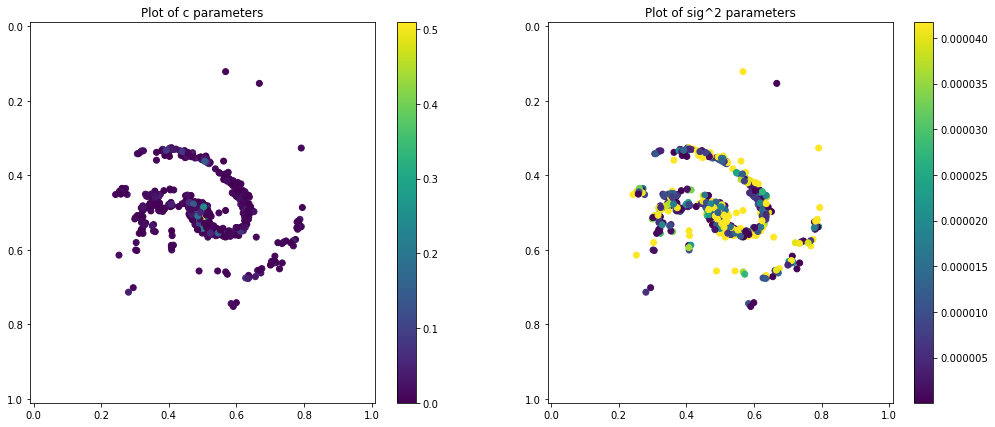

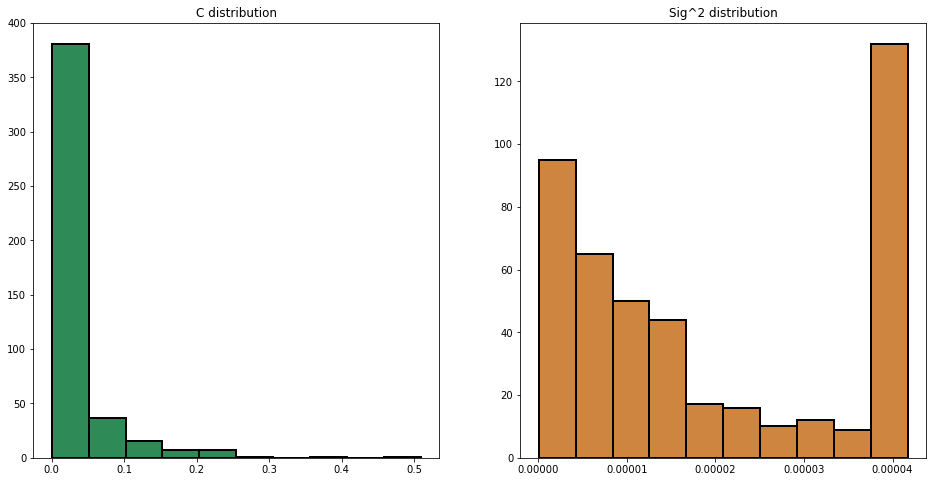

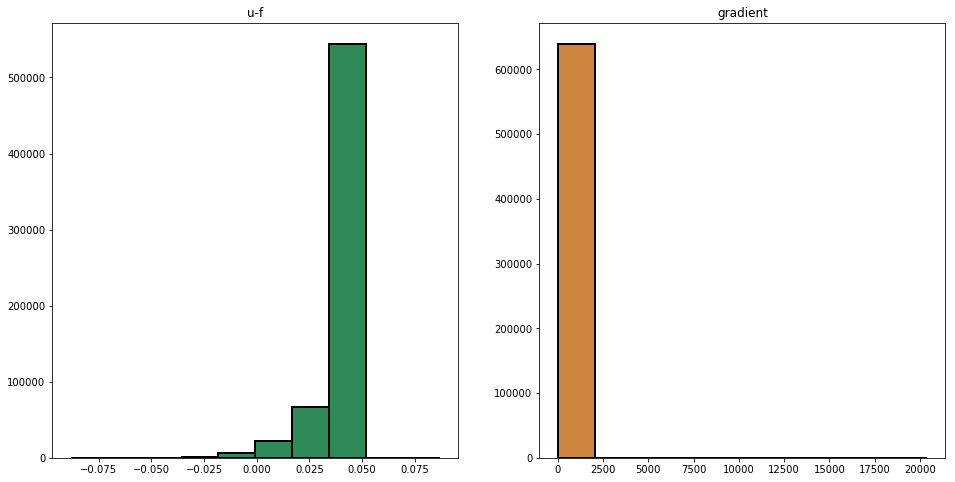

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 24730

Residual stats:
Residual RMS: 0.04516383932043084
Residual Variance: 0.001930206199824831
Flux Lost: 0.1586982413774206
Flux Addition: 0.05603434915075413
psi1(u-f): 1.081706111063033
Exceeded Pixels: 6418
Sharpness: 128.933502745757
psi2(grad u): 0.4785803240964926
Total elapsed time: 246.8224630355835 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0753430707178719
Mean min distance between collocation and c

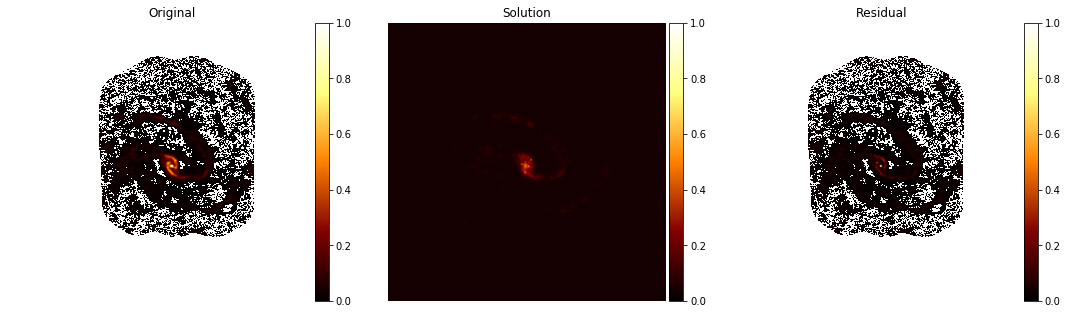

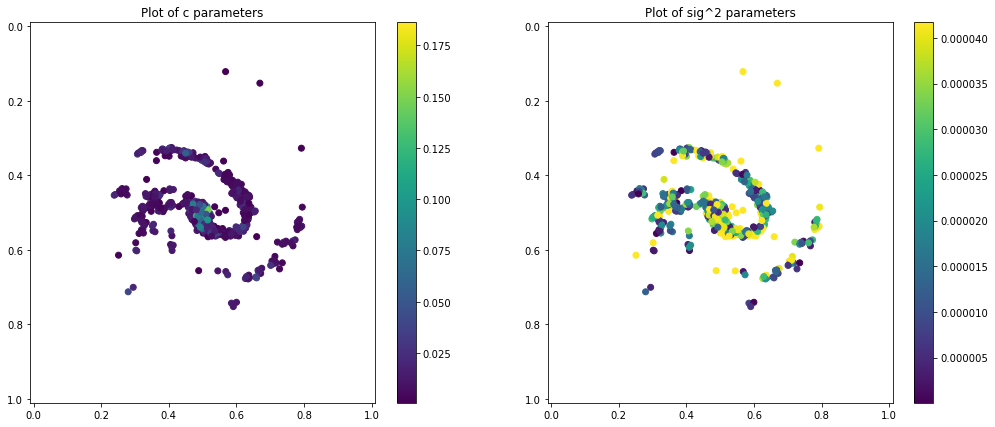

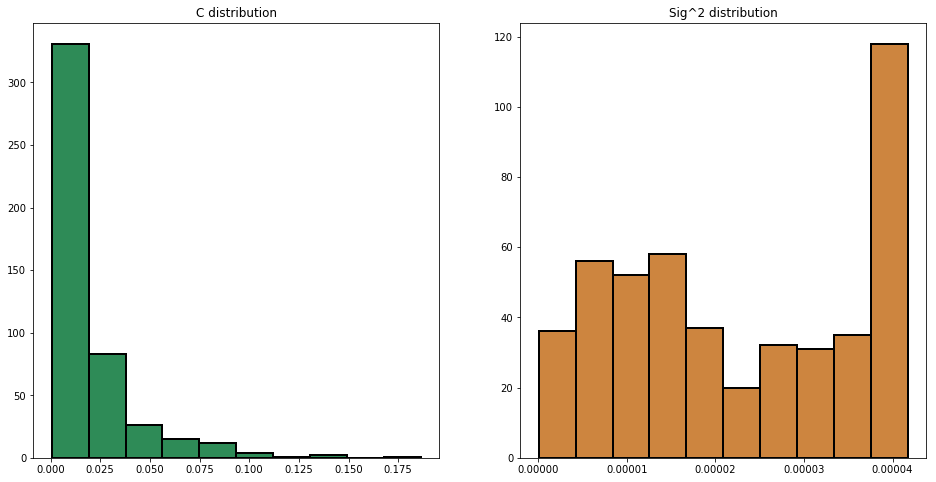

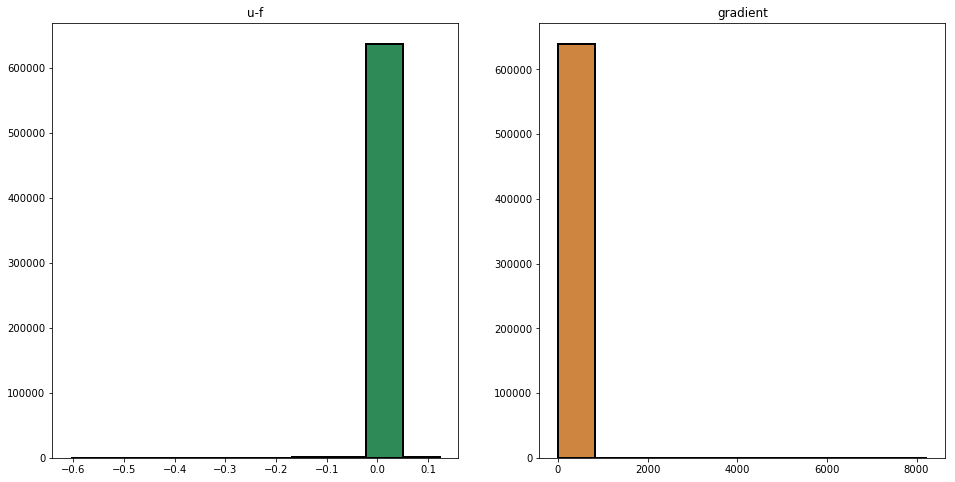

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 4
message: The cosine of the angle between func(x) and any column of the
  Jacobian is at most 0.000000 in absolute value
nfev: 2001

Residual stats:
Residual RMS: 0.08948714795582263
Residual Variance: 0.0067608728483986805
Flux Lost: 0.3796014912814518
Flux Addition: 0.03324282339686047
psi1(u-f): 0.13081620688842155
Exceeded Pixels: 5346
Sharpness: 105.23560698736725
psi2(grad u): 0.24879687772424794
Total elapsed time: 20.479593515396118 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.155059553475039

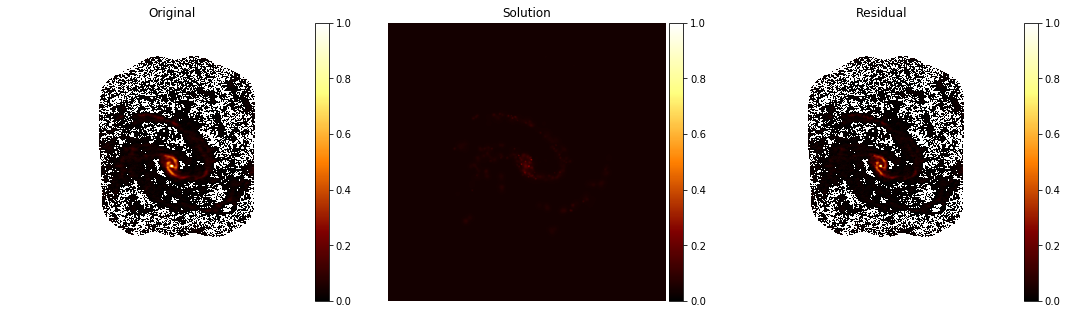

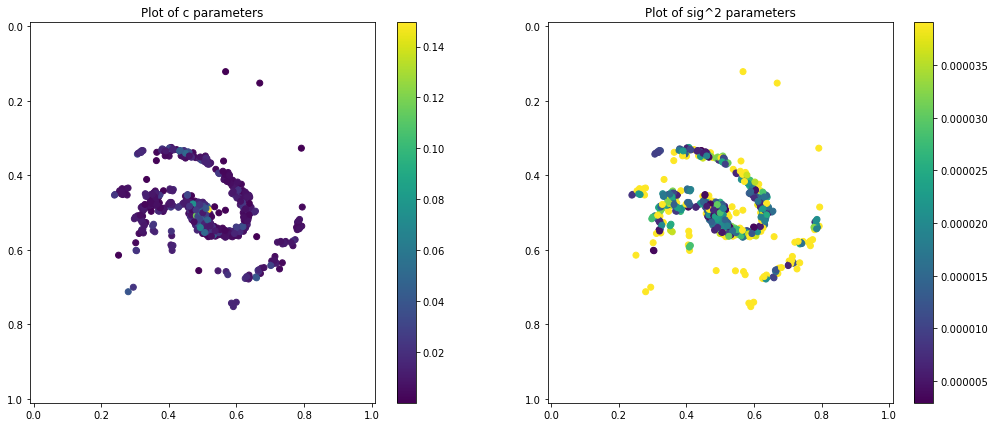

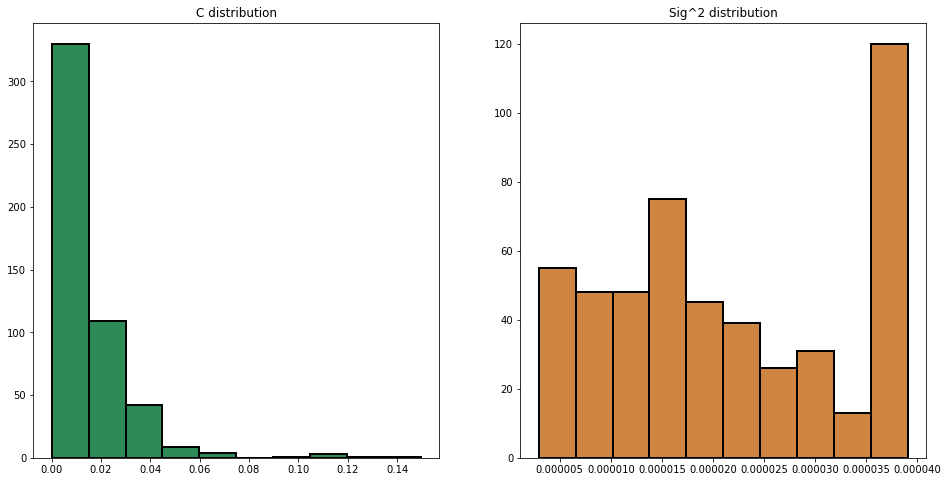

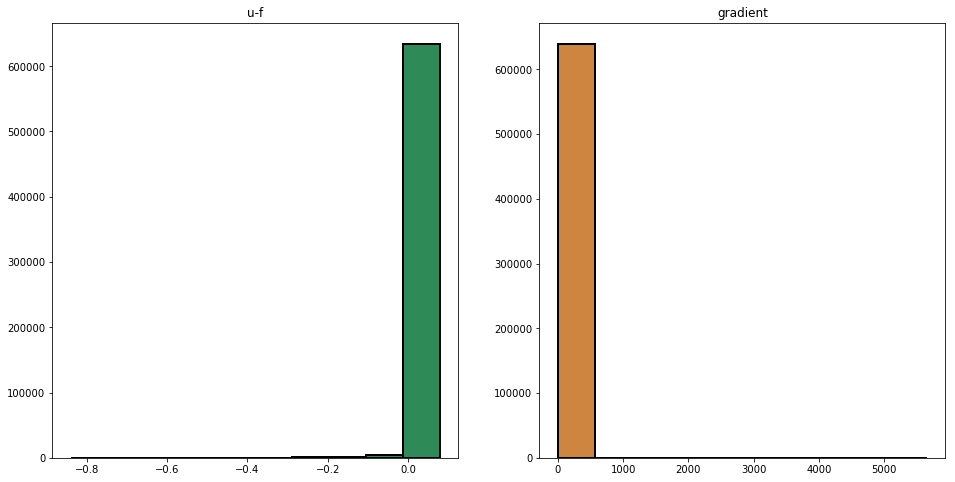

In [9]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    del elm.data; del elm.mask; del elm.dfunc
    
#pickling results
target = open("exp01_m100.pkl", "wb")
pickle.dump(elm_list, target)
target.close()

## Analysis of results in `M100`

In [6]:
elm_list = pickle.load( open('../results/exp01_m100.pkl', 'rb') )

FileNotFoundError: [Errno 2] No such file or directory: '../results/exp01_m100.pkl'

In [ ]:
n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]

variance = np.array( [var for (var,_,_,_,_,_,_,_,_) in r_stats] )
entropy = np.array( [entr for (_,entr,_,_,_,_,_,_,_) in r_stats] )
rms = np.array( [rms for (_,_,rms,_,_,_,_,_,_) in r_stats] )
flux_addition = np.array( [flux for (_,_,_,flux,_,_,_,_,_) in r_stats] )
flux_lost = np.array( [flux for (_,_,_,_,flux,_,_,_,_) in r_stats] )
psi1_int = np.array( [psi1 for (_,_,_,_,_,psi1,_,_,_) in r_stats] )
npix = np.array( [npix for (_,_,_,_,_,_,npix,_,_) in r_stats] )
sharpness = np.array( [sharp for (_,_,_,_,_,_,_,sharp,_) in r_stats] )
psi2_int = np.array( [psi2 for (_,_,_,_,_,_,_,_,psi2) in r_stats] )

times = np.array([elm.elapsed_time for elm in elm_list])

In [ ]:
stats_plot(n_center[3:], r_stats[3:], x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-1.,0.5,-0.5,-1.])